In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from pandas.plotting import parallel_coordinates

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib_venn import venn3, venn3_circles

import squarify, circlify
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import networkx as nx
from scipy.cluster import hierarchy
from pydataset import data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
import warnings
warnings.filterwarnings('ignore')

---
# AIRBNB PRICES ON THE FRENCH RIVIERA
---

In [4]:
df = pd.read_csv('datasets/OneNum.csv')
df = df[df['price']<300]
df

price
0      75.0
1     104.0
4      92.0
5      64.0
6     265.0
...     ...
9990   97.0
9991   58.0
9992  127.0
9993  143.0
9994  132.0

[8904 rows x 1 columns]

## Histogram

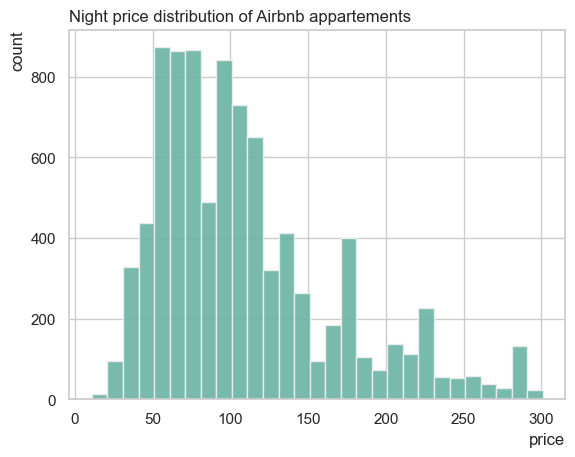

In [5]:
sns.histplot(data=df, x='price', binwidth=10, color='#69b3a2', edgecolor='#e9ecef', alpha=0.9)
plt.title('Night price distribution of Airbnb appartements', loc='left')
plt.xlabel('price', loc='right')
plt.ylabel('count', loc='top')
plt.show()

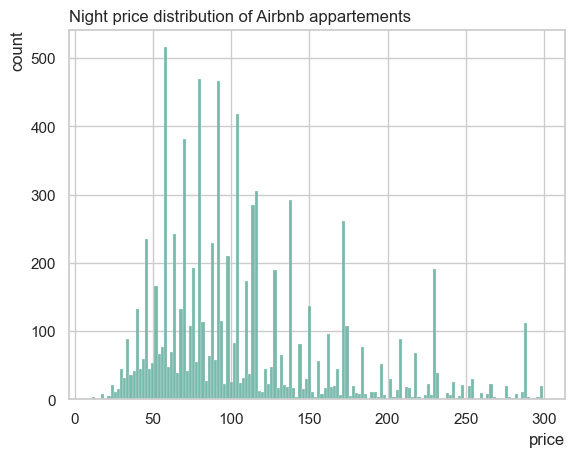

In [6]:
sns.histplot(data=df, x='price', binwidth=2, color='#69b3a2', edgecolor='#e9ecef', alpha=0.9)
plt.title('Night price distribution of Airbnb appartements', loc='left')
plt.xlabel('price', loc='right')
plt.ylabel('count', loc='top')
plt.show()

## Density

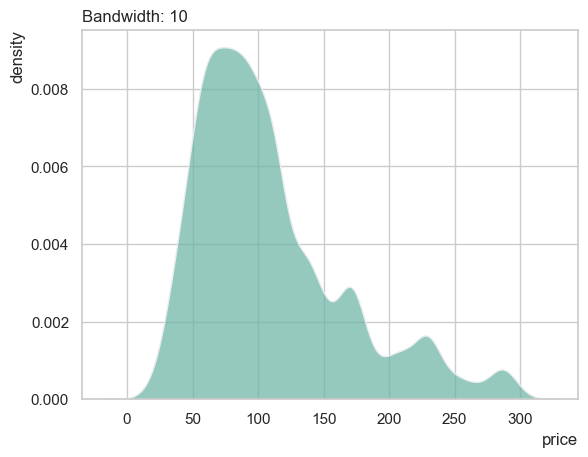

In [7]:
sns.kdeplot(data=df, x='price',fill=True, bw_adjust=1, color='#69b3a2', edgecolor='#e9ecef', alpha=0.7)
plt.title('Bandwidth: 10', loc='left')
plt.ylabel('density', loc='top')
plt.xlabel('price', loc='right')
plt.show()

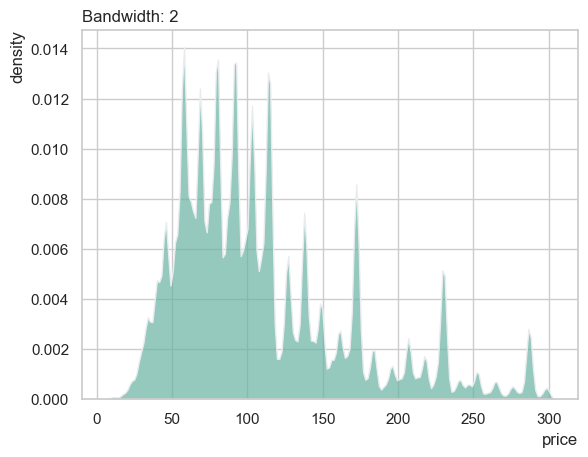

In [8]:
sns.kdeplot(data=df, x='price',fill=True, bw_adjust=0.2, color='#69b3a2', edgecolor='#e9ecef', alpha=0.7)
plt.title('Bandwidth: 2', loc='left')
plt.ylabel('density', loc='top')
plt.xlabel('price', loc='right')
plt.show()

---
# APARTMENT PRICE VS GROUND LIVING AREA
---

In [9]:
df = pd.read_csv('datasets/TwoNum.csv')
df.SalePrice = df.SalePrice/1000
df

GrLivArea  SalePrice
0          1710    208.500
1          1262    181.500
2          1786    223.500
3          1717    140.000
4          2198    250.000
...         ...        ...
1455       1647    175.000
1456       2073    210.000
1457       2340    266.500
1458       1078    142.125
1459       1256    147.500

[1460 rows x 2 columns]

## Histogram

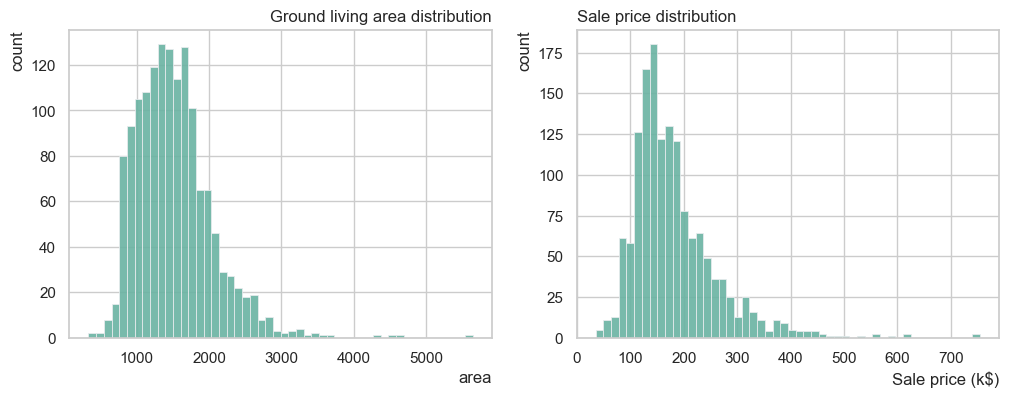

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(data=df, x='GrLivArea', bins=50, color='#69b3a2', edgecolor="#e9ecef", ax=ax1, alpha=0.9)
ax1.set_title('Ground living area distribution', loc='right')
ax1.set_ylabel('count', loc='top')
ax1.set_xlabel('area', loc='right')

sns.histplot(data=df, x='SalePrice', bins=50, color='#69b3a2', edgecolor="#e9ecef", ax=ax2, alpha=0.9)
ax2.set_title('Sale price distribution', loc='left')
ax2.set_ylabel('count', loc='top')
ax2.set_xlabel('Sale price (k$)', loc='right')

plt.show()

## Scatterplot

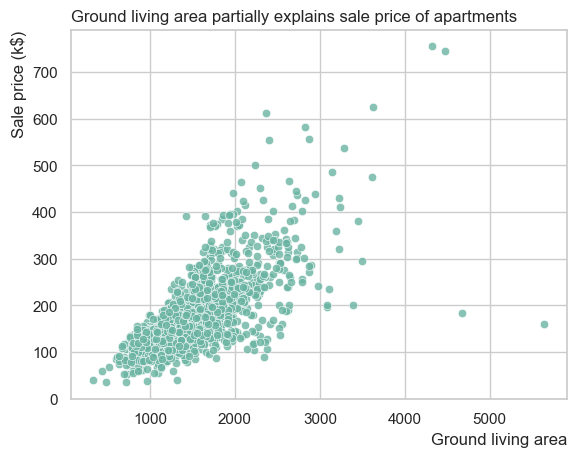

In [11]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', color='#69b3a2', alpha=0.8)
plt.ylabel('Sale price (k$)', loc='top')
plt.xlabel('Ground living area', loc='right')
plt.title('Ground living area partially explains sale price of apartments', loc='left')
plt.show()

## Scatterplot (Trend line)

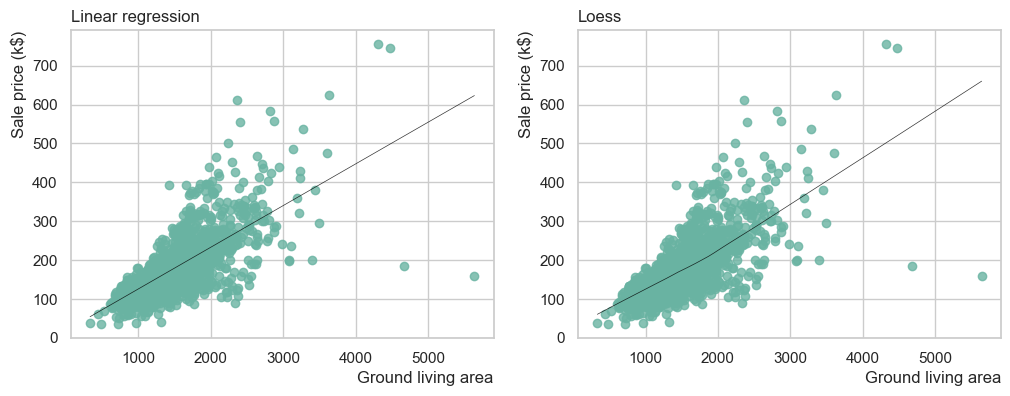

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.regplot(data=df, x='GrLivArea', y='SalePrice', color='#69b3a2', ci=None,
            ax=ax1, line_kws=dict(color='black', alpha=0.8, lw=0.5))
ax1.set_title('Linear regression', loc='left')
ax1.set_ylabel('Sale price (k$)', loc='top')
ax1.set_xlabel('Ground living area', loc='right')

sns.regplot(data=df, x='GrLivArea', y='SalePrice', color='#69b3a2', lowess=True,
            ax=ax2, line_kws=dict(color='black', alpha=0.8, lw=0.5))
ax2.set_title('Loess', loc='left')
ax2.set_ylabel('Sale price (k$)', loc='top')
ax2.set_xlabel('Ground living area', loc='right')

plt.show()

## Scatterplot (Interactivity)

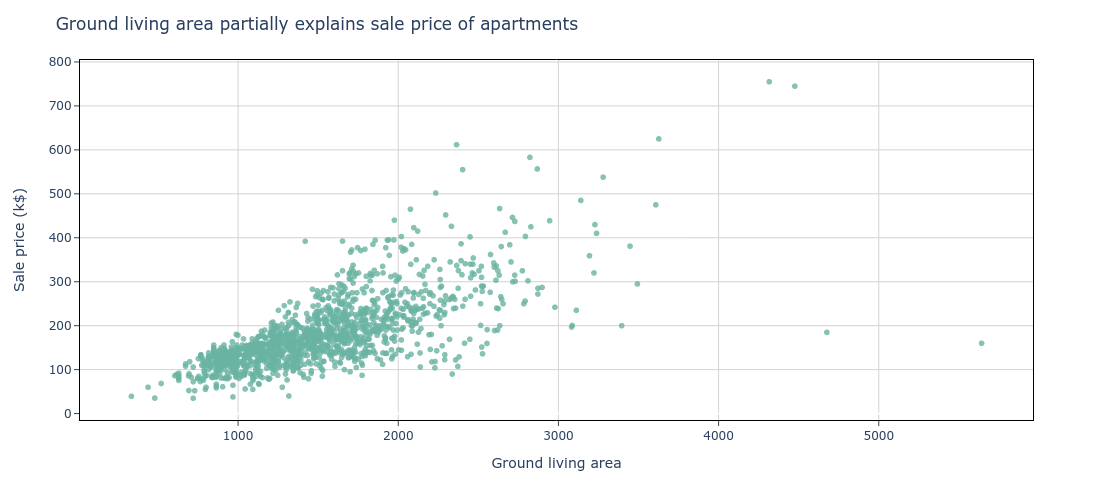

In [13]:
fig = px.scatter(df, x='GrLivArea', y='SalePrice', color_discrete_sequence=["#69b3a2"], opacity=0.8, width=800, height=500)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)


fig.update_layout(
    plot_bgcolor='white',
    yaxis_title='Sale price (k$)',
    xaxis_title='Ground living area',
    title={'text': 'Ground living area partially explains sale price of apartments'}
)

fig.show()

## Dot size

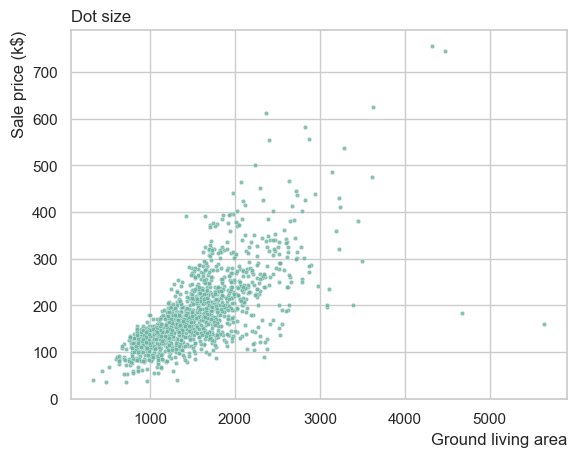

In [14]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', color='#69b3a2', alpha=0.8, s=10)
plt.ylabel('Sale price (k$)', loc='top')
plt.xlabel('Ground living area', loc='right')
plt.title('Dot size', loc='left')
plt.show()

## Density 2d: contour

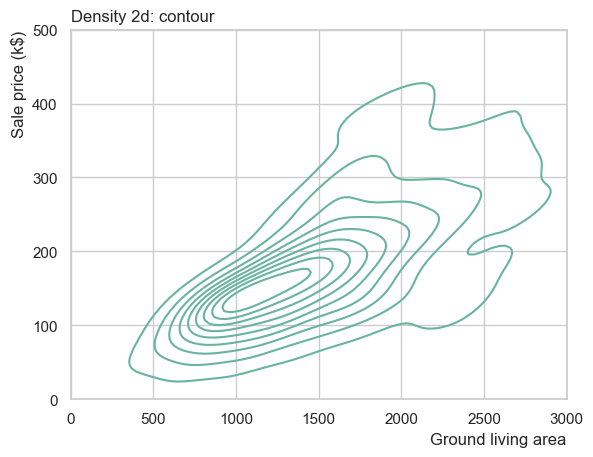

In [15]:
sns.kdeplot(df, x='GrLivArea', y='SalePrice', color='#69b3a2')
plt.ylabel('Sale price (k$)', loc='top')
plt.xlabel('Ground living area', loc='right')
plt.title('Density 2d: contour', loc='left')

plt.xlim(0,3000)
plt.ylim(0,500)
plt.show()

## Density 2d: area

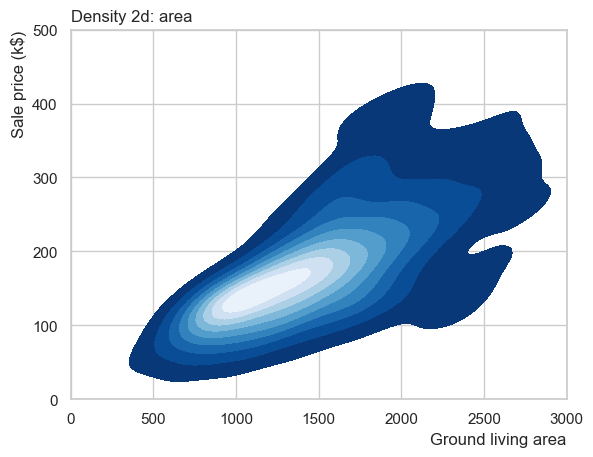

In [16]:
sns.kdeplot(df, x='GrLivArea', y='SalePrice', cmap='Blues_r', fill=True)
plt.ylabel('Sale price (k$)', loc='top')
plt.xlabel('Ground living area', loc='right')
plt.title('Density 2d: area', loc='left')

plt.xlim(0,3000)
plt.ylim(0,500)
plt.show()

## Density 2d: raster

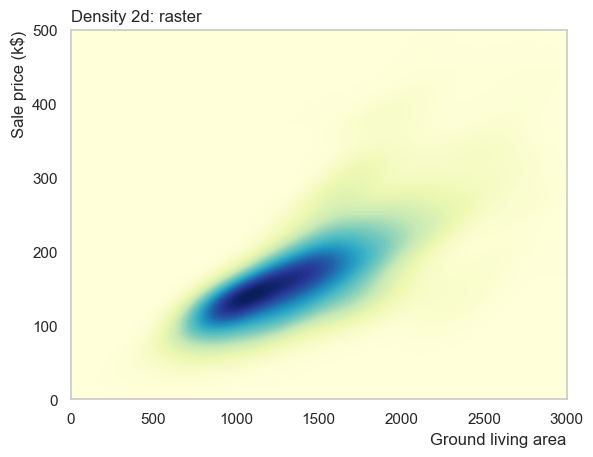

In [17]:
sns.kdeplot(df, x='GrLivArea', y='SalePrice', cmap='YlGnBu', levels=100, fill=True, thresh=0)
plt.ylabel('Sale price (k$)', loc='top')
plt.xlabel('Ground living area', loc='right')
plt.title('Density 2d: raster', loc='left')

plt.xlim(0,3000)
plt.ylim(0,500)
plt.show()

## Hexbin

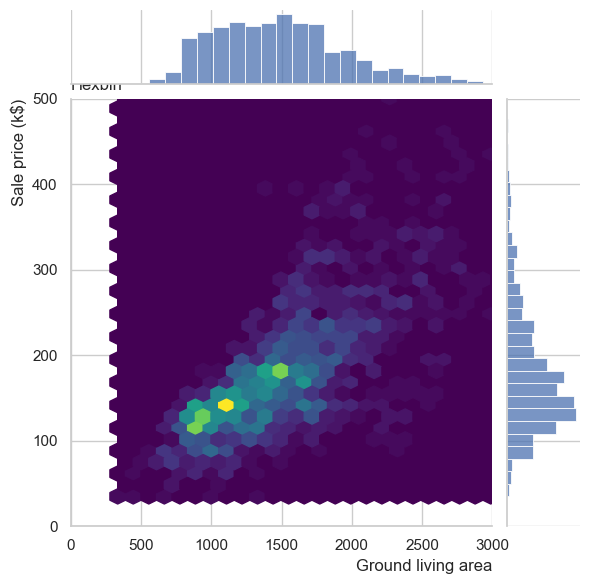

In [18]:
sns.jointplot(df, x='GrLivArea', y='SalePrice', cmap='viridis', kind='hex')
plt.ylabel('Sale price (k$)', loc='top')
plt.xlabel('Ground living area', loc='right')
plt.title('Hexbin', loc='left')

plt.xlim(0,3000)
plt.ylim(0,500)
plt.show()

## 2d histogram

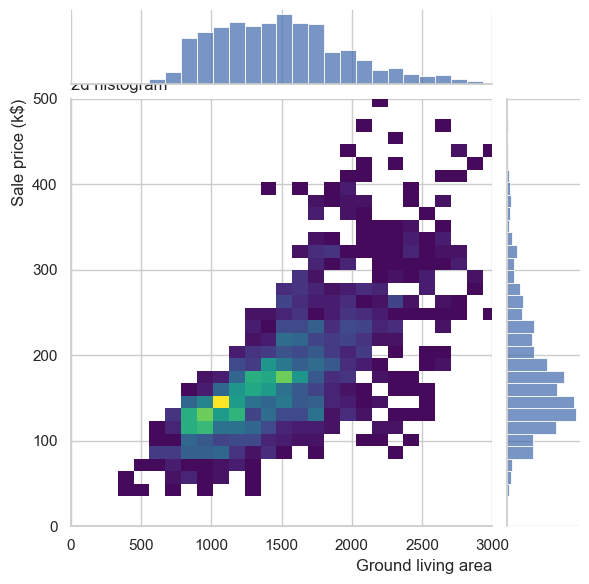

In [19]:
sns.jointplot(df, x='GrLivArea', y='SalePrice', cmap='viridis', kind='hist')
plt.ylabel('Sale price (k$)', loc='top')
plt.xlabel('Ground living area', loc='right')
plt.title('2d histogram', loc='left')

plt.xlim(0,3000)
plt.ylim(0,500)
plt.show()

---
# EVOLUTION OF THE BITCOIN PRICE
---

In [20]:
df = pd.read_csv('datasets/TwoNumOrdered.csv')
df.date = pd.to_datetime(df.date)
df

date    value
0    2013-04-28   135.98
1    2013-04-29   147.49
2    2013-04-30   146.93
3    2013-05-01   139.89
4    2013-05-02   125.60
...         ...      ...
1817 2018-04-19  8298.69
1818 2018-04-20  8880.23
1819 2018-04-21  8997.57
1820 2018-04-22  9001.64
1821 2018-04-23  8958.55

[1822 rows x 2 columns]

## Line plot

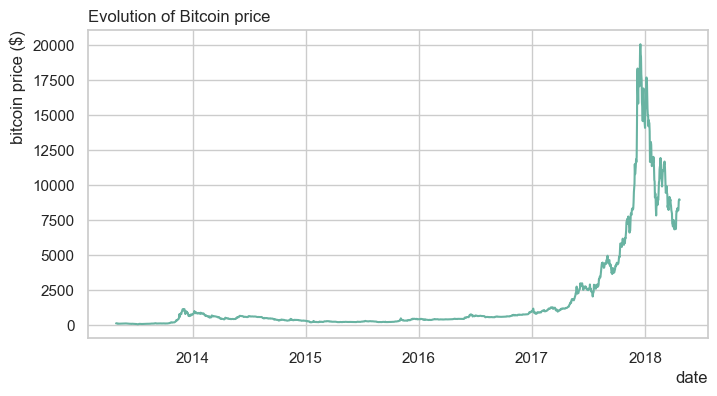

In [21]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(df, x='date', y='value', color='#69b3a2')
plt.ylabel('bitcoin price ($)', loc='top')
plt.xlabel('date', loc='right')
plt.title('Evolution of Bitcoin price', loc='left')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

## Area chart

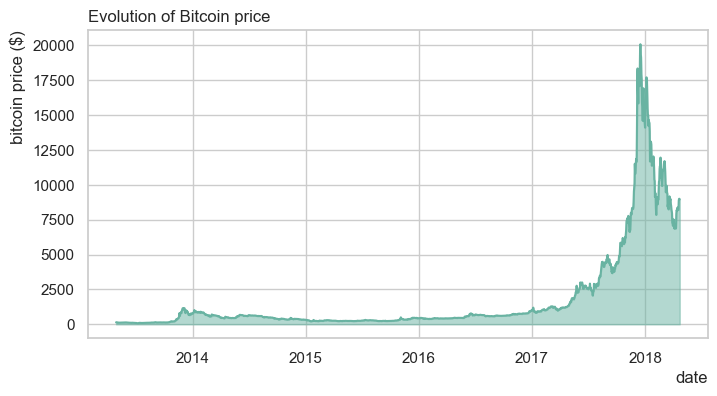

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(df, x='date', y='value', color='#69b3a2')
plt.ylabel('bitcoin price ($)', loc='top')
plt.xlabel('date', loc='right')
plt.title('Evolution of Bitcoin price', loc='left')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.fill_between(df.date, df.value, color='#69b3a2', alpha=0.5)

plt.show()

## Interactivity

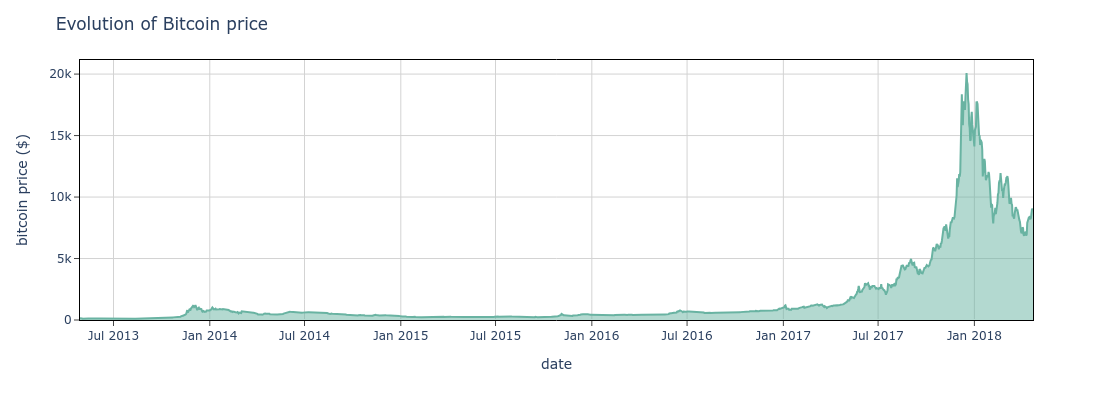

In [23]:
fig = px.area(df, x='date', y='value', color_discrete_sequence=['#69b3a2'], width=800, height=400)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)


fig.update_layout(
    plot_bgcolor='white',
    yaxis_title='bitcoin price ($)',
    xaxis_title='date',
    title={'text': 'Evolution of Bitcoin price'}
)

fig.show()

## Connected scatter

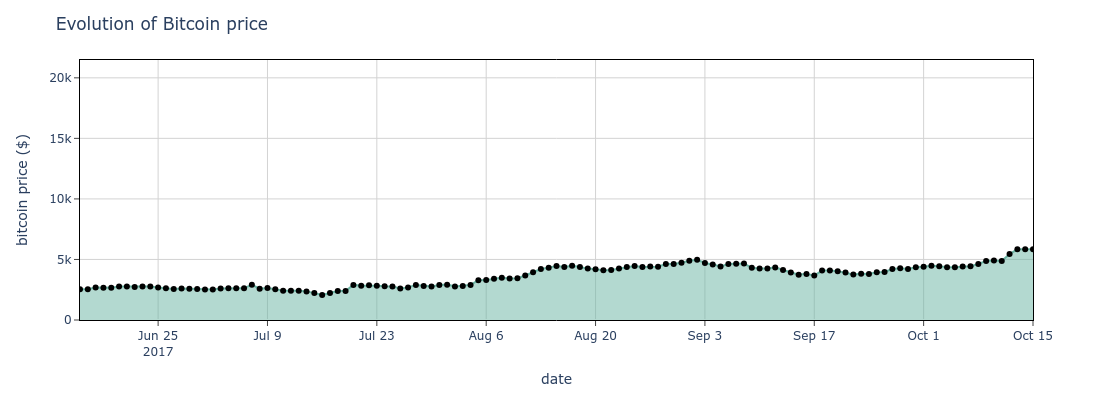

In [24]:
fig = px.area(df, x='date', y='value', markers=True, color_discrete_sequence=['#69b3a2'], width=800, height=400)
fig.update_traces(marker=dict(color='black'))
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)


fig.update_layout(
    plot_bgcolor='white',
    yaxis_title='bitcoin price ($)',
    xaxis_title='date',
    title={'text': 'Evolution of Bitcoin price'},
    xaxis_range=['2017-06-15', '2017-10-15']
)

fig.show()

## Comparing to a limit

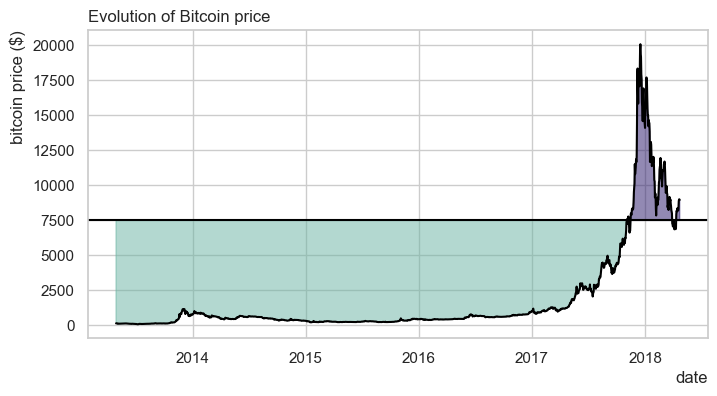

In [25]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(df, x='date', y='value', color='black')
plt.axhline(y=7500, color='black')
plt.ylabel('bitcoin price ($)', loc='top')
plt.xlabel('date', loc='right')
plt.title('Evolution of Bitcoin price', loc='left')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.fill_between(df.date, 7500, df.value, where=(df.value<7500), color='#69b3a2', alpha=0.5)
plt.fill_between(df.date, 7500, df.value, where=(df.value>7500), color='#271569', alpha=0.5)

plt.show()

---
# LIFE EXPECTANCY, GDP PER CAPITA AND POPULATION SIZE
---

In [26]:
df = pd.read_csv('datasets/ThreeNum.csv')
df

country continent  lifeExp         pop     gdpPercap
0                 Afghanistan      Asia   43.828    31889923    974.580338
1                     Albania    Europe   76.423     3600523   5937.029526
2                     Algeria    Africa   72.301    33333216   6223.367465
3                      Angola    Africa   42.731    12420476   4797.231267
4                   Argentina  Americas   75.320    40301927  12779.379640
5                   Australia   Oceania   81.235    20434176  34435.367440
6                     Austria    Europe   79.829     8199783  36126.492700
7                     Bahrain      Asia   75.635      708573  29796.048340
8                  Bangladesh      Asia   64.062   150448339   1391.253792
9                     Belgium    Europe   79.441    10392226  33692.605080
10                      Benin    Africa   56.728     8078314   1441.284873
11                    Bolivia  Americas   65.554     9119152   3822.137084
12     Bosnia and Herzegovina    Europe   74.852     4552198   7446.298803
13                   Botswana    Africa   50.728     1639131  12569.851770
14                     Brazil  Americas   72.390   190010647   9065.800825
15                   Bulgaria    Europe   73.005     7322858  10680.792820
16               Burkina Faso    Africa   52.295    14326203   1217.032994
17                    Burundi    Africa   49.580     8390505    430.070692
18                   Cambodia      Asia   59.723    14131858   1713.778686
19                   Cameroon    Africa   50.430    17696293   2042.095240
20                     Canada  Americas   80.653    33390141  36319.235010
21   Central African Republic    Africa   44.741     4369038    706.016537
22                       Chad    Africa   50.651    10238807   1704.063724
23                      Chile  Americas   78.553    16284741  13171.638850
24                      China      Asia   72.961  1318683096   4959.114854
25                   Colombia  Americas   72.889    44227550   7006.580419
26                    Comoros    Africa   65.152      710960    986.147879
27           Congo, Dem. Rep.    Africa   46.462    64606759    277.551859
28                Congo, Rep.    Africa   55.322     3800610   3632.557798
29                 Costa Rica  Americas   78.782     4133884   9645.061420
30              Cote d'Ivoire    Africa   48.328    18013409   1544.750112
31                    Croatia    Europe   75.748     4493312  14619.222720
32                       Cuba  Americas   78.273    11416987   8948.102923
33             Czech Republic    Europe   76.486    10228744  22833.308510
34                    Denmark    Europe   78.332     5468120  35278.418740
35                   Djibouti    Africa   54.791      496374   2082.481567
36         Dominican Republic  Americas   72.235     9319622   6025.374752
37                    Ecuador  Americas   74.994    13755680   6873.262326
38                      Egypt    Africa   71.338    80264543   5581.180998
39                El Salvador  Americas   71.878     6939688   5728.353514
40          Equatorial Guinea    Africa   51.579      551201  12154.089750
41                    Eritrea    Africa   58.040     4906585    641.369524
42                   Ethiopia    Africa   52.947    76511887    690.805576
43                    Finland    Europe   79.313     5238460  33207.084400
44                     France    Europe   80.657    61083916  30470.016700
45                      Gabon    Africa   56.735     1454867  13206.484520
46                     Gambia    Africa   59.448     1688359    752.749726
47                    Germany    Europe   79.406    82400996  32170.374420
48                      Ghana    Africa   60.022    22873338   1327.608910
49                     Greece    Europe   79.483    10706290  27538.411880
50                  Guatemala  Americas   70.259    12572928   5186.050003
51                     Guinea    Africa   56.007     9947814    942.654211
52              Guinea-Bissau    Africa   46.38

## Bubble plot

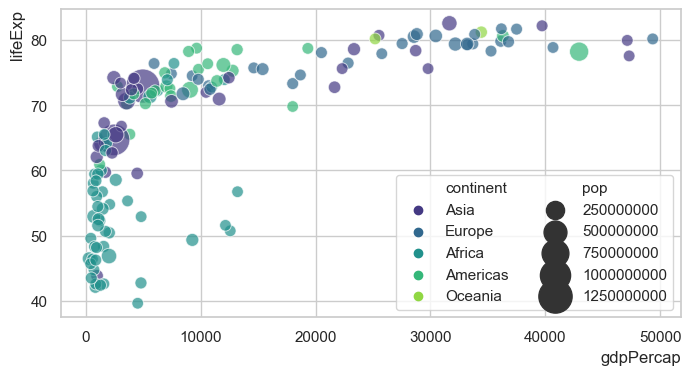

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(df, x='gdpPercap', y='lifeExp', size='pop', hue='continent', alpha=0.7, sizes=(70,600), palette='viridis')
plt.xlabel('gdpPercap', loc='right')
plt.ylabel('lifeExp', loc='top')
plt.legend(ncol=2)
plt.show()

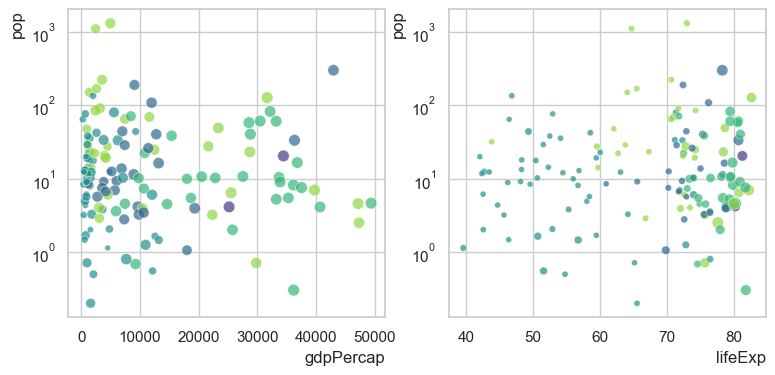

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
sns.scatterplot(df, x='gdpPercap', y=df['pop']/1000000, size='lifeExp', hue='continent',
                alpha=0.7, palette='viridis_r', ax=ax1, legend=False, s=200)
ax1.set_xlabel('gdpPercap', loc='right')
ax1.set_ylabel('pop', loc='top')

sns.scatterplot(df, x='lifeExp', y=df['pop']/1000000, size='gdpPercap', hue='continent',
                alpha=0.7, palette='viridis_r', ax=ax2, legend=False, s=200)
ax2.set_xlabel('lifeExp', loc='right')
ax2.set_ylabel('pop', loc='top')

ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

In [29]:
df = pd.DataFrame(data('volcano').to_numpy().T)
df.columns = list(map(lambda x:str(int(x)+1), df.columns))
df['lat'] = [each+1 for each in range(len(df))]
df = pd.melt(df, id_vars=['lat'], var_name='long', value_name='alt')
df

lat long  alt
0       1    1  100
1       2    1  100
2       3    1  101
3       4    1  101
4       5    1  101
...   ...  ...  ...
5302   57   87   94
5303   58   87   94
5304   59   87   94
5305   60   87   94
5306   61   87   94

[5307 rows x 3 columns]

## Heatmap

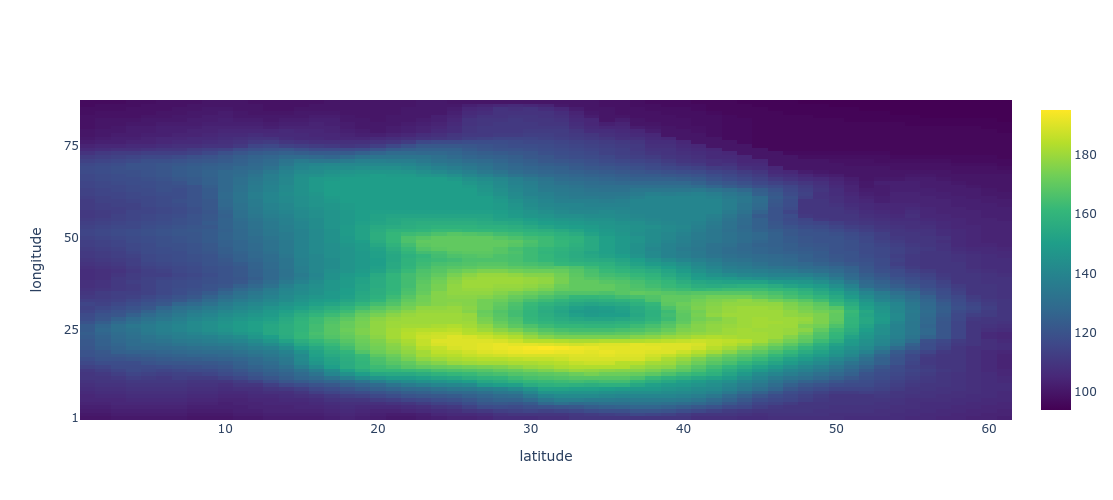

In [30]:
fig = go.Figure(data=go.Heatmap(x=df.lat, y=df.long, z=df.alt, type = 'heatmap', colorscale = 'Viridis'))
fig.update_layout(width=500, height=500)
fig.update_layout(
    xaxis_title="latitude",
    yaxis_title="longitude",
    legend_title="attitude",
    showlegend=True,
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0, 25, 50, 75],
    )
)
fig.show()

## Surface plot

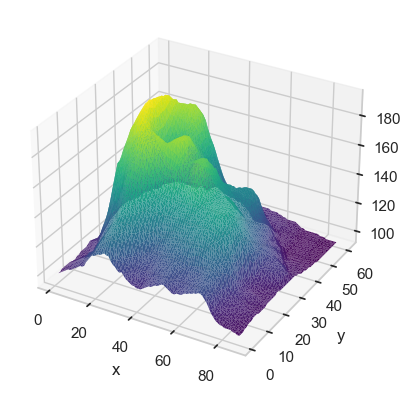

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(df.long, df.lat, df.alt, cmap=plt.cm.viridis, linewidth=1e-5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()

---
# EVOLUTION OF BABY NAMES IN THE US
---

In [32]:
df = pd.read_csv('datasets/OneCatSevNumOrdered.csv')
df

year sex      name    n      prop
0     1880   F     Helen  636  0.006516
1     1880   F    Amanda  241  0.002469
2     1880   F     Betty  117  0.001199
3     1880   F   Dorothy  112  0.001147
4     1880   F     Linda   27  0.000277
...    ...  ..       ...  ...       ...
1156  2015   F     Linda  423  0.000219
1157  2015   F   Dorothy  395  0.000204
1158  2015   F   Deborah  346  0.000179
1159  2015   F  Patricia  346  0.000179
1160  2015   F     Betty  186  0.000096

[1161 rows x 5 columns]

## Line plot

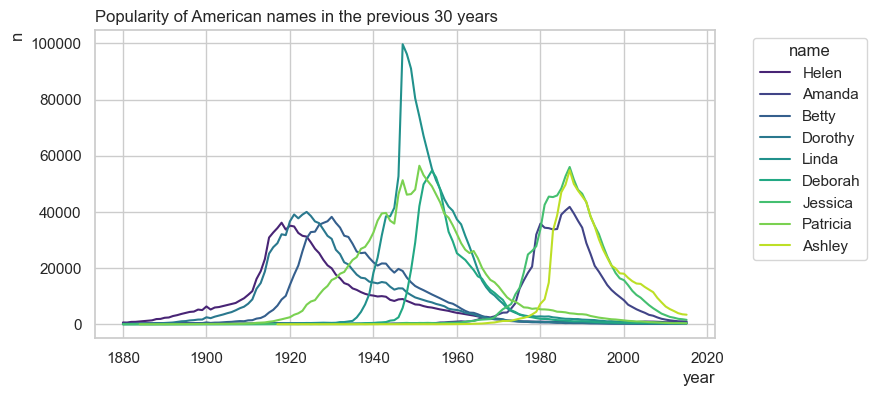

In [33]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(df, x='year', y='n', hue='name', palette='viridis')
plt.ylabel('n', loc='top')
plt.xlabel('year', loc='right')
plt.title('Popularity of American names in the previous 30 years', loc='left')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='name')
plt.show()

## Sphagetti chart

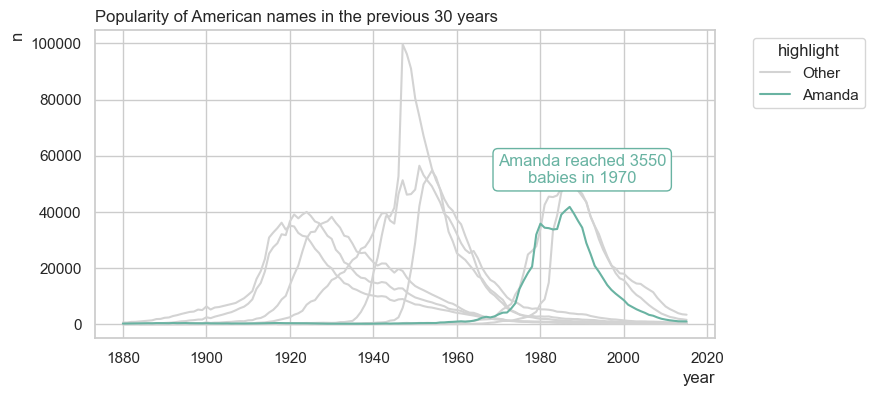

In [34]:
fig, ax = plt.subplots(figsize=(8,4))

for each in df.name.unique():
    if each != 'Amanda':
        sns.lineplot(df[df.name==each], x='year', y='n', color='lightgrey', sizes=0.2, label='Other')

sns.lineplot(df[df.name=='Amanda'], x='year', y='n', color='#69b3a2', sizes=1.5, label='Amanda')

plt.ylabel('n', loc='top')
plt.xlabel('year', loc='right')
plt.title('Popularity of American names in the previous 30 years', loc='left')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left', title='highlight')

plt.text(1990, 55000, 'Amanda reached 3550\nbabies in 1970', color='#69b3a2',
        verticalalignment='center', horizontalalignment='center',
        bbox={'facecolor':'white', 'alpha':1, 'edgecolor':'#69b3a2', 'boxstyle':'round'}
)

plt.show()

## Area chart

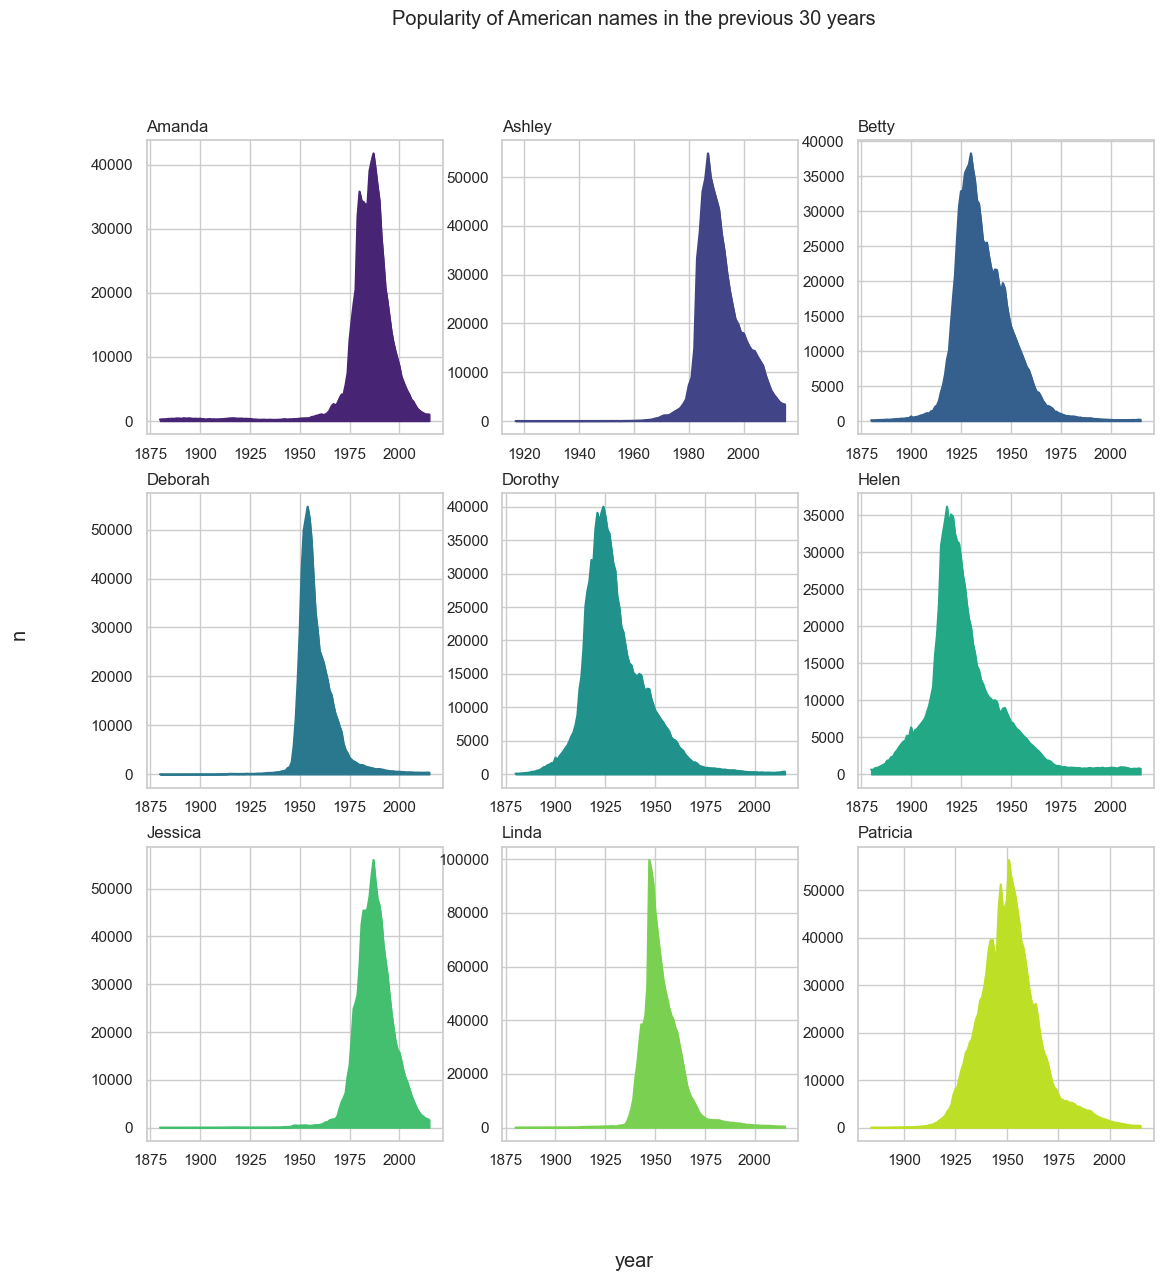

In [35]:
fig, ax = plt.subplots(3,3, figsize=(13,13))

viridiscp = sns.color_palette('viridis', 9)

for i, name in enumerate(sorted(df.name.unique())):
    subdf = df[df.name==name]
    sns.lineplot(subdf, x='year', y='n', color=viridiscp[i], ax=ax[i//3][i%3])
    ax[i//3][i%3].set_xlabel('')
    ax[i//3][i%3].set_ylabel('')
    ax[i//3][i%3].set_title(name, loc='left')
    ax[i//3][i%3].fill_between(subdf.year, subdf.n, color=viridiscp[i])
    
fig.suptitle('Popularity of American names in the previous 30 years')
fig.supylabel('n')
fig.supxlabel('year')

plt.show()

## Stack area chart

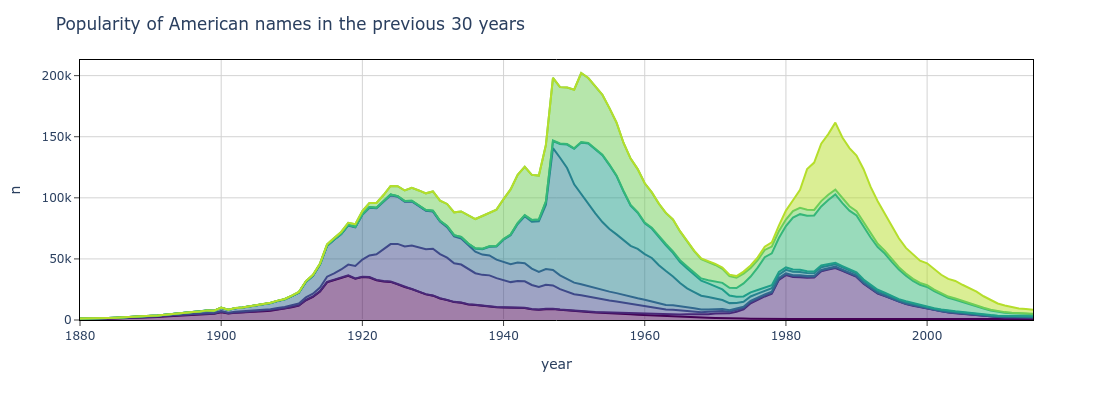

In [36]:
fig = px.area(df, x='year', y='n', color='name', color_discrete_sequence=px.colors.sequential.Viridis, width=800, height=400)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)


fig.update_layout(
    plot_bgcolor='white',
    yaxis_title='n',
    xaxis_title='year',
    title={'text': 'Popularity of American names in the previous 30 years'},
    showlegend=False
)

fig.show()

## Streamgraph

In [37]:
colors = sns.color_palette('Spectral_r', len(df.name.unique()))

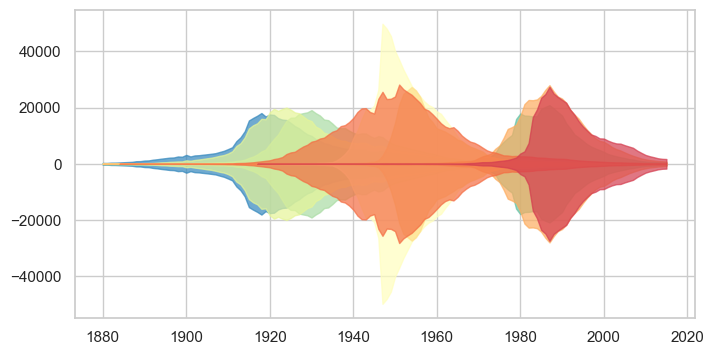

In [38]:
fig, ax = plt.subplots(figsize=(8, 4))
for idx, name in enumerate(df.name.unique()):
    tempdf = df[df.name==name]
    ax.stackplot(tempdf.year, tempdf.n, baseline='sym', color=colors[idx], alpha=0.7)
plt.show()

---
# ELEVEN FEATURES FOR 32 CARS
---

In [39]:
df = pd.read_csv('datasets/SeveralNum.csv')
df.columns = ['model'] + list(df.columns)[1:]
df

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am   
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1  \
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4  
15     3     4  
16     3     4  
17     4     1  
18     4     2  
19     4     1  
20     3     1  
21     3     2  
22     3     2  
23     3     4  
24     3     2  
25     4     1  
26     5     2  
27     5     2  
28     5     4  
29     5     6  
30     5     8  
31     4     2

## Distribution

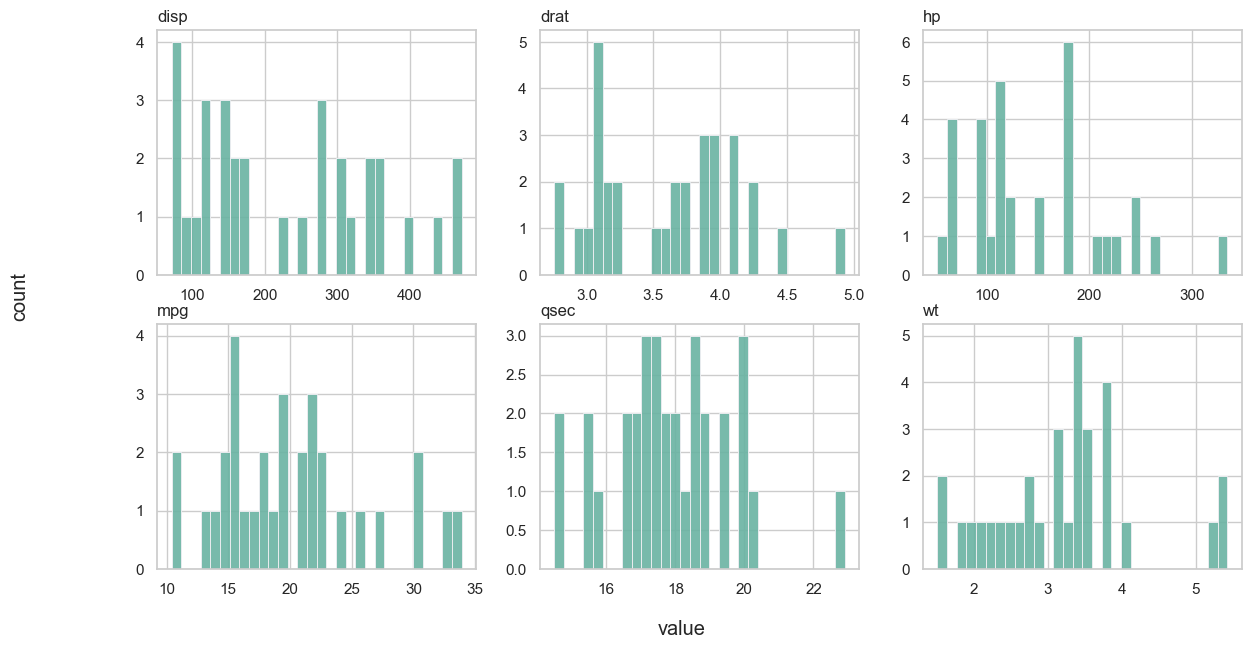

In [40]:
cols = ['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']
fig, ax = plt.subplots(2,3,figsize=(14,7))

for i,col in enumerate(sorted(cols)):
    sns.histplot(data=df, x=col, color='#69b3a2', edgecolor='#e9ecef', bins=30, alpha=0.9, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(col, loc='left')
    ax[i//3][i%3].set_xlabel('')
    ax[i//3][i%3].set_ylabel('')

fig.supxlabel('value')
fig.supylabel('count')

plt.show()

## Correlogram

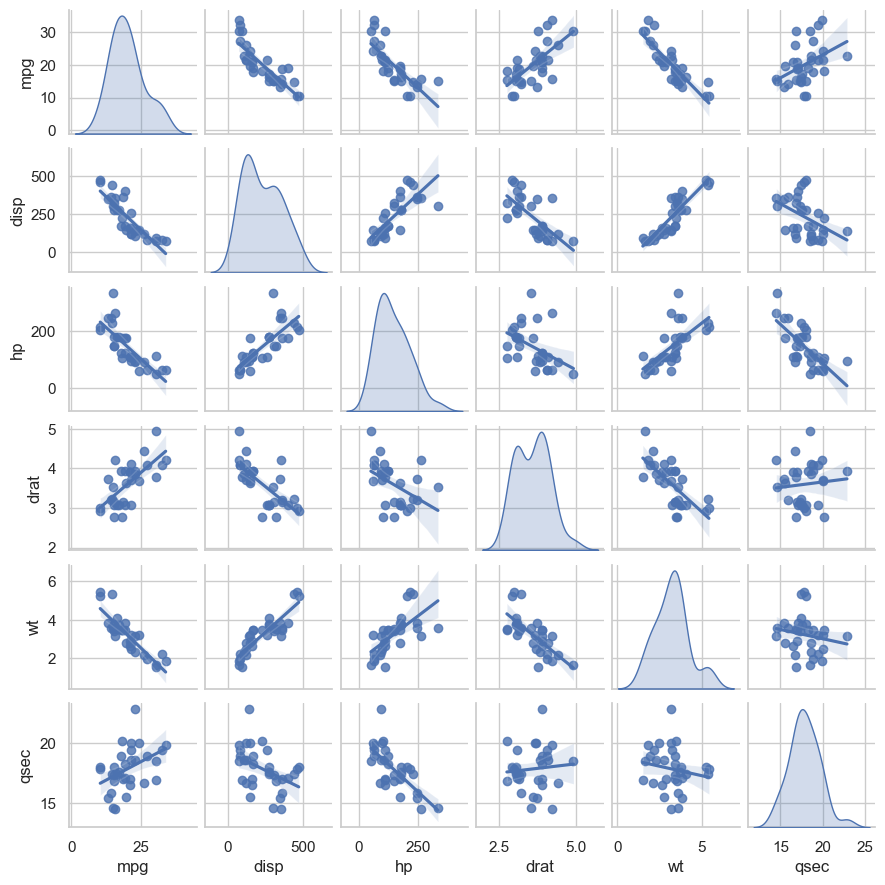

In [41]:
sns.pairplot(df[cols], markers='o', diag_kind='kde', height=1.5, kind='reg')
plt.show()

## Dendogram

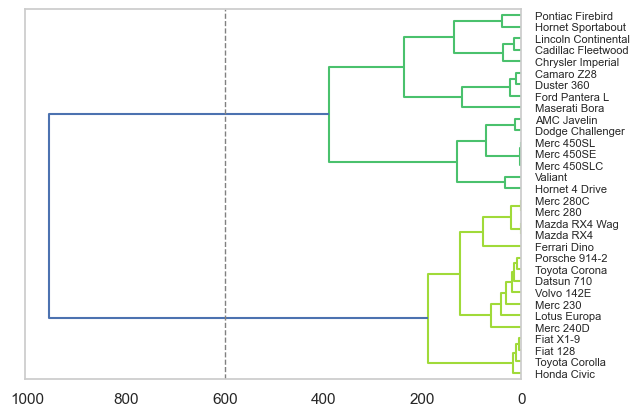

In [42]:
df = pd.read_csv('datasets/SeveralNum.csv')
df.columns = ['model'] + list(df.columns)[1:]
df = df.set_index('model')

Z = hierarchy.linkage(df, 'ward')
hierarchy.set_link_color_palette(list(sns.color_palette('viridis_r',).as_hex()))
hierarchy.dendrogram(Z, orientation="left", labels=df.index)
plt.axvline(x=600, c='grey', lw=1, linestyle='dashed')

plt.grid(False)
# plt.axis('off')
plt.show()

## Heatmap

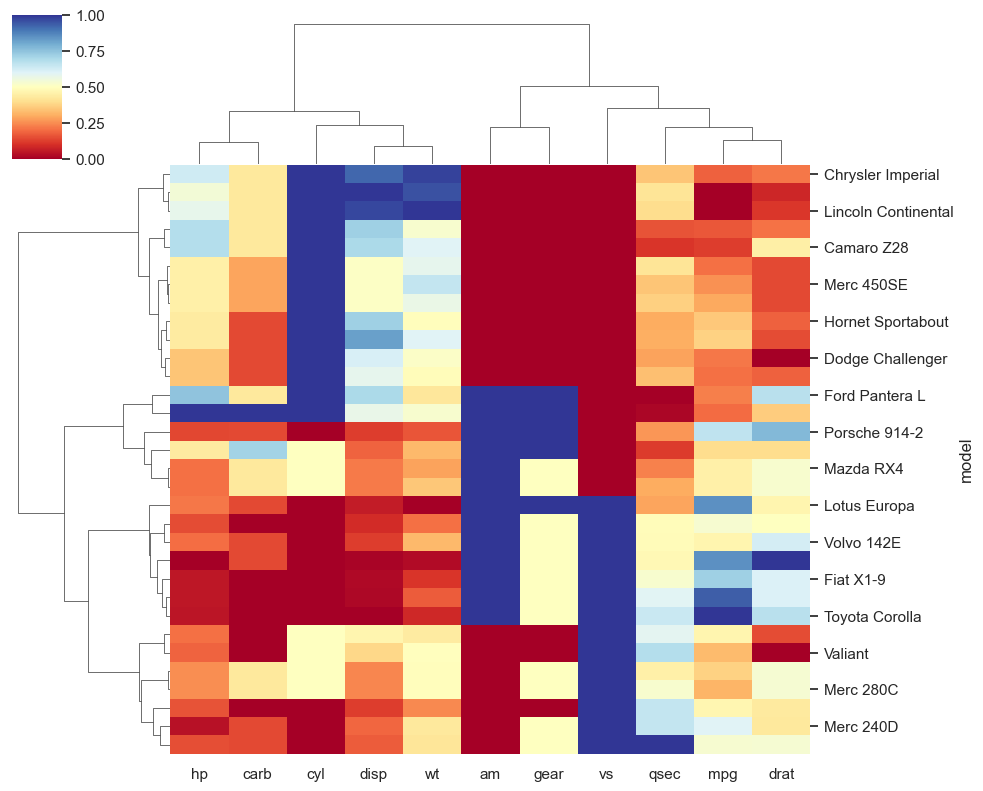

In [43]:
df = pd.read_csv('datasets/SeveralNum.csv')
df.columns = ['model'] + list(df.columns)[1:]
df = df.set_index('model')

fg = sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="RdYlBu", figsize=(10,8))
plt.show()

## PCA

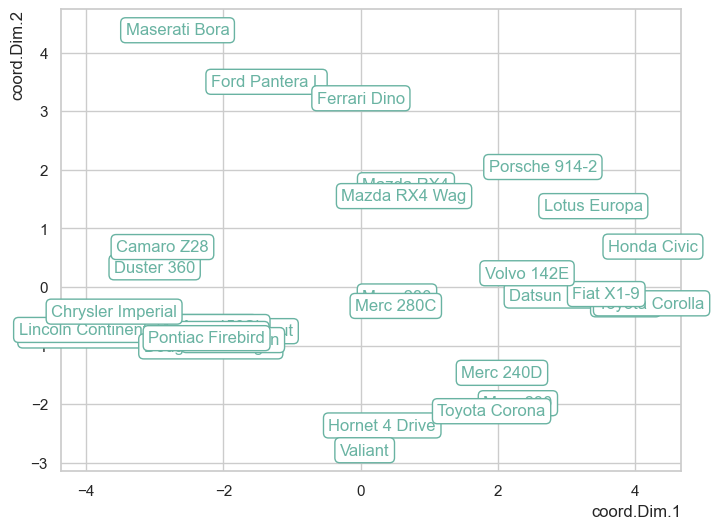

In [44]:
df = pd.read_csv('datasets/SeveralNum.csv')
df.columns = ['model'] + list(df.columns)[1:]
names = list(df.model)
df = df.drop('model', axis=1)

pcadf = pd.DataFrame(PCA(n_components=2).fit_transform(StandardScaler().fit_transform(df)), columns=['comp1', 'comp2'])

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(pcadf, x='comp1', y='comp2', ax=ax)

for each in range(len(names)):
    plt.text(pcadf['comp1'][each], pcadf['comp2'][each], names[each], color='#69b3a2',
        verticalalignment='center', horizontalalignment='center',
        bbox={'facecolor':'white', 'alpha':1, 'edgecolor':'#69b3a2', 'boxstyle':'round'}
)
ax.set_xlabel('coord.Dim.1', loc='right')
ax.set_ylabel('coord.Dim.2', loc='top')
plt.show()

---
# WHO SELLS MORE WEAPONS?
---

In [45]:
df = pd.read_csv('datasets/OneCatOneNum.csv')
df

Country    Value
0         United States  12394.0
1                Russia   6148.0
2         Germany (FRG)   1653.0
3                France   2162.0
4        United Kingdom   1214.0
5                 China   1131.0
6          Soviet Union      NaN
7           Netherlands   1167.0
8                 Italy    660.0
9                Israel   1263.0
10              Ukraine    240.0
11                Spain    814.0
12               Sweden     83.0
13          Switzerland    186.0
14               Canada     87.0
15          South Korea    587.0
16              Belarus     23.0
17               Norway    134.0
18               Turkey    244.0
19         South Africa     74.0
20       Czech Republic    110.0
21               Poland      3.0
22              Belgium     12.0
23            Australia     97.0
24               Brazil     45.0
25       Czechoslovakia      NaN
26          North Korea      NaN
27              Finland     58.0
28           Uzbekistan      NaN
29                Japan      2.0
30             Slovakia     22.0
31              Denmark     12.0
32             Bulgaria      NaN
33              Austria     22.0
34           Yugoslavia      NaN
35               Jordan     77.0
36                  UAE     72.0
37            Singapore      NaN
38              Moldova      NaN
39  Unknown supplier(s)      7.0
40            Indonesia    102.0
41                 Iran     10.0
42                Libya      NaN
43              Romania      NaN
44             Portugal     56.0
45                India     56.0
46           Kazakhstan      NaN
47               Serbia      2.0
48              Ireland      NaN
49              Hungary      NaN
50               Others     77.0

In [46]:
df = df.dropna(axis=0)
df.reset_index(inplace=True, drop=True)
df

Country    Value
0         United States  12394.0
1                Russia   6148.0
2         Germany (FRG)   1653.0
3                France   2162.0
4        United Kingdom   1214.0
5                 China   1131.0
6           Netherlands   1167.0
7                 Italy    660.0
8                Israel   1263.0
9               Ukraine    240.0
10                Spain    814.0
11               Sweden     83.0
12          Switzerland    186.0
13               Canada     87.0
14          South Korea    587.0
15              Belarus     23.0
16               Norway    134.0
17               Turkey    244.0
18         South Africa     74.0
19       Czech Republic    110.0
20               Poland      3.0
21              Belgium     12.0
22            Australia     97.0
23               Brazil     45.0
24              Finland     58.0
25                Japan      2.0
26             Slovakia     22.0
27              Denmark     12.0
28              Austria     22.0
29               Jordan     77.0
30                  UAE     72.0
31  Unknown supplier(s)      7.0
32            Indonesia    102.0
33                 Iran     10.0
34             Portugal     56.0
35                India     56.0
36               Serbia      2.0
37               Others     77.0

## Lollipop

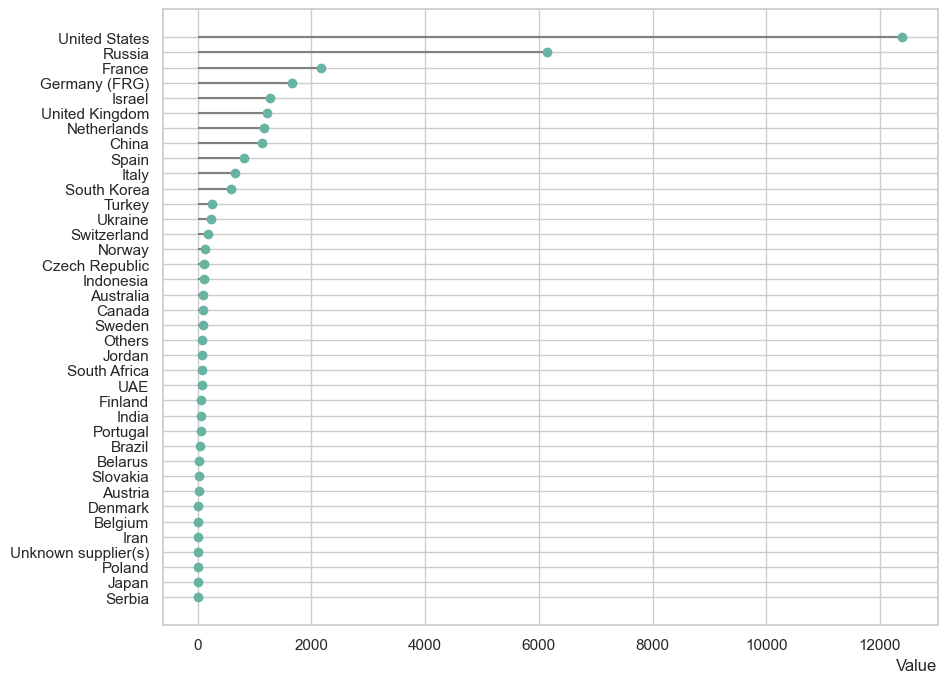

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
ordereddf = df.sort_values(by='Value')
Range = range(1, len(df.index)+1)

plt.hlines(y=Range, xmin=0, xmax=ordereddf['Value'], color='grey')
plt.plot(ordereddf['Value'], Range, "o", color='#69b3a2')
plt.yticks(Range, ordereddf['Country'])
plt.xlabel('Value', loc='right')
plt.show()


## Barplot

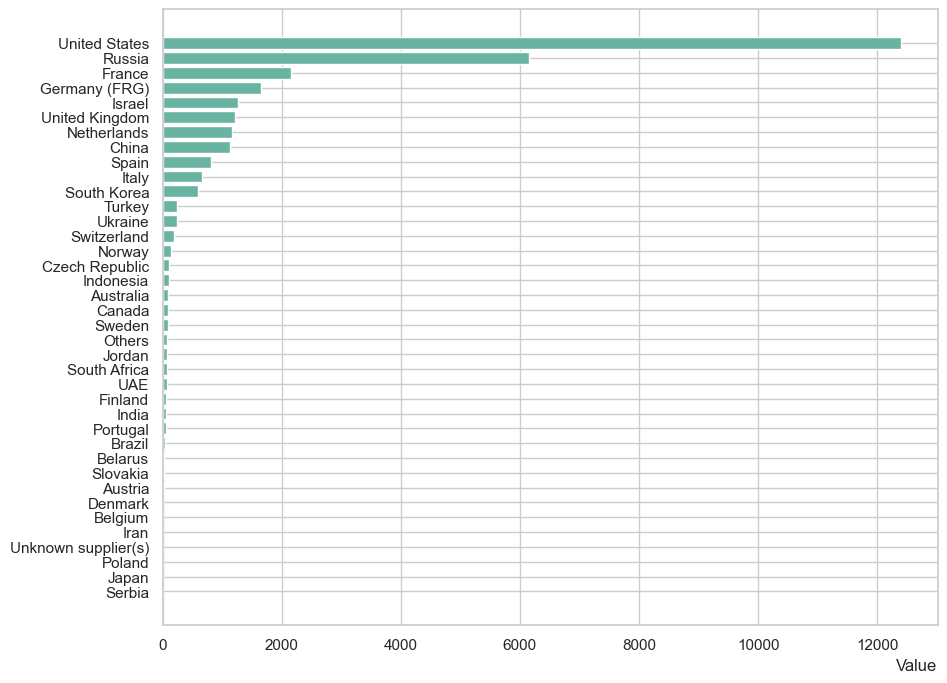

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
plt.barh(y=ordereddf.Country, width=ordereddf.Value, color='#69b3a2')
plt.xlabel('Value', loc='right')
plt.show()

## Circular barplot

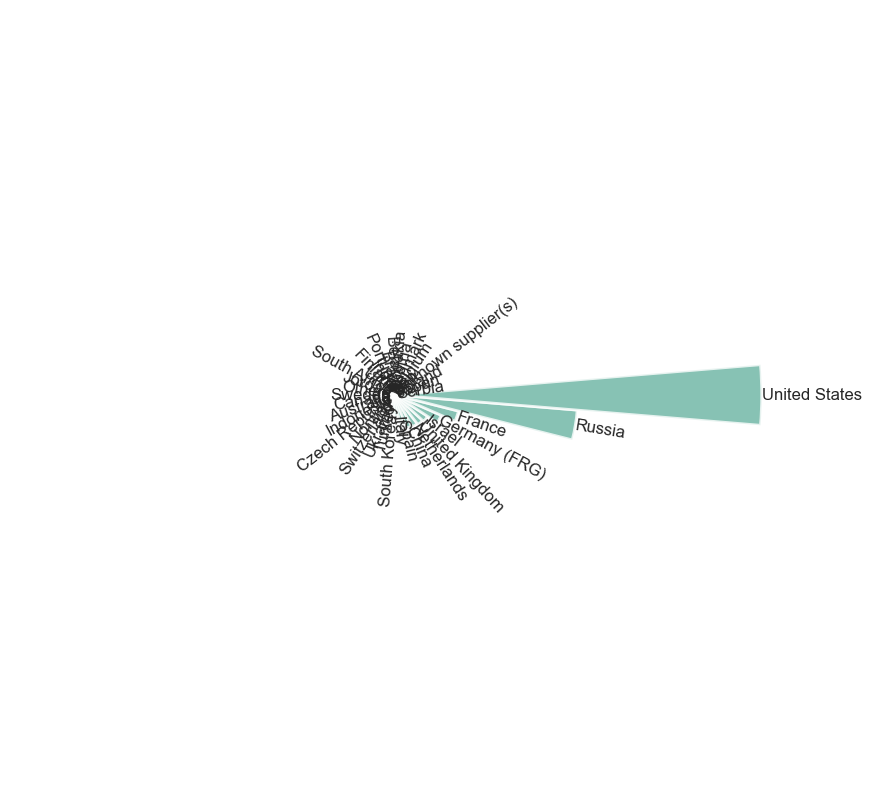

In [49]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperlimit = 100
lowerlimit = 30
labelpadding = 4

maxi = df['Value'].max()
slope = (maxi - lowerlimit) / maxi
heights = slope*ordereddf.Value + lowerlimit
width = 2*np.pi / len(df.index)

indexes = list(range(1, len(df.index)+1))
angles = [element*width for element in indexes]

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerlimit,
    linewidth=2, 
    edgecolor="white",
    color="#69b3a2",
    alpha=0.8
)

for bar, angle, height, label in zip(bars,angles, heights, ordereddf["Country"]):
    rotation = np.rad2deg(angle)
    alignment = ''
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = 'right'
        rotation = rotation + 180
    else: 
        alignment = 'left'
        
    ax.text(
        x=angle, 
        y=lowerlimit + bar.get_height() + labelpadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor"
    ) 

## Treemap

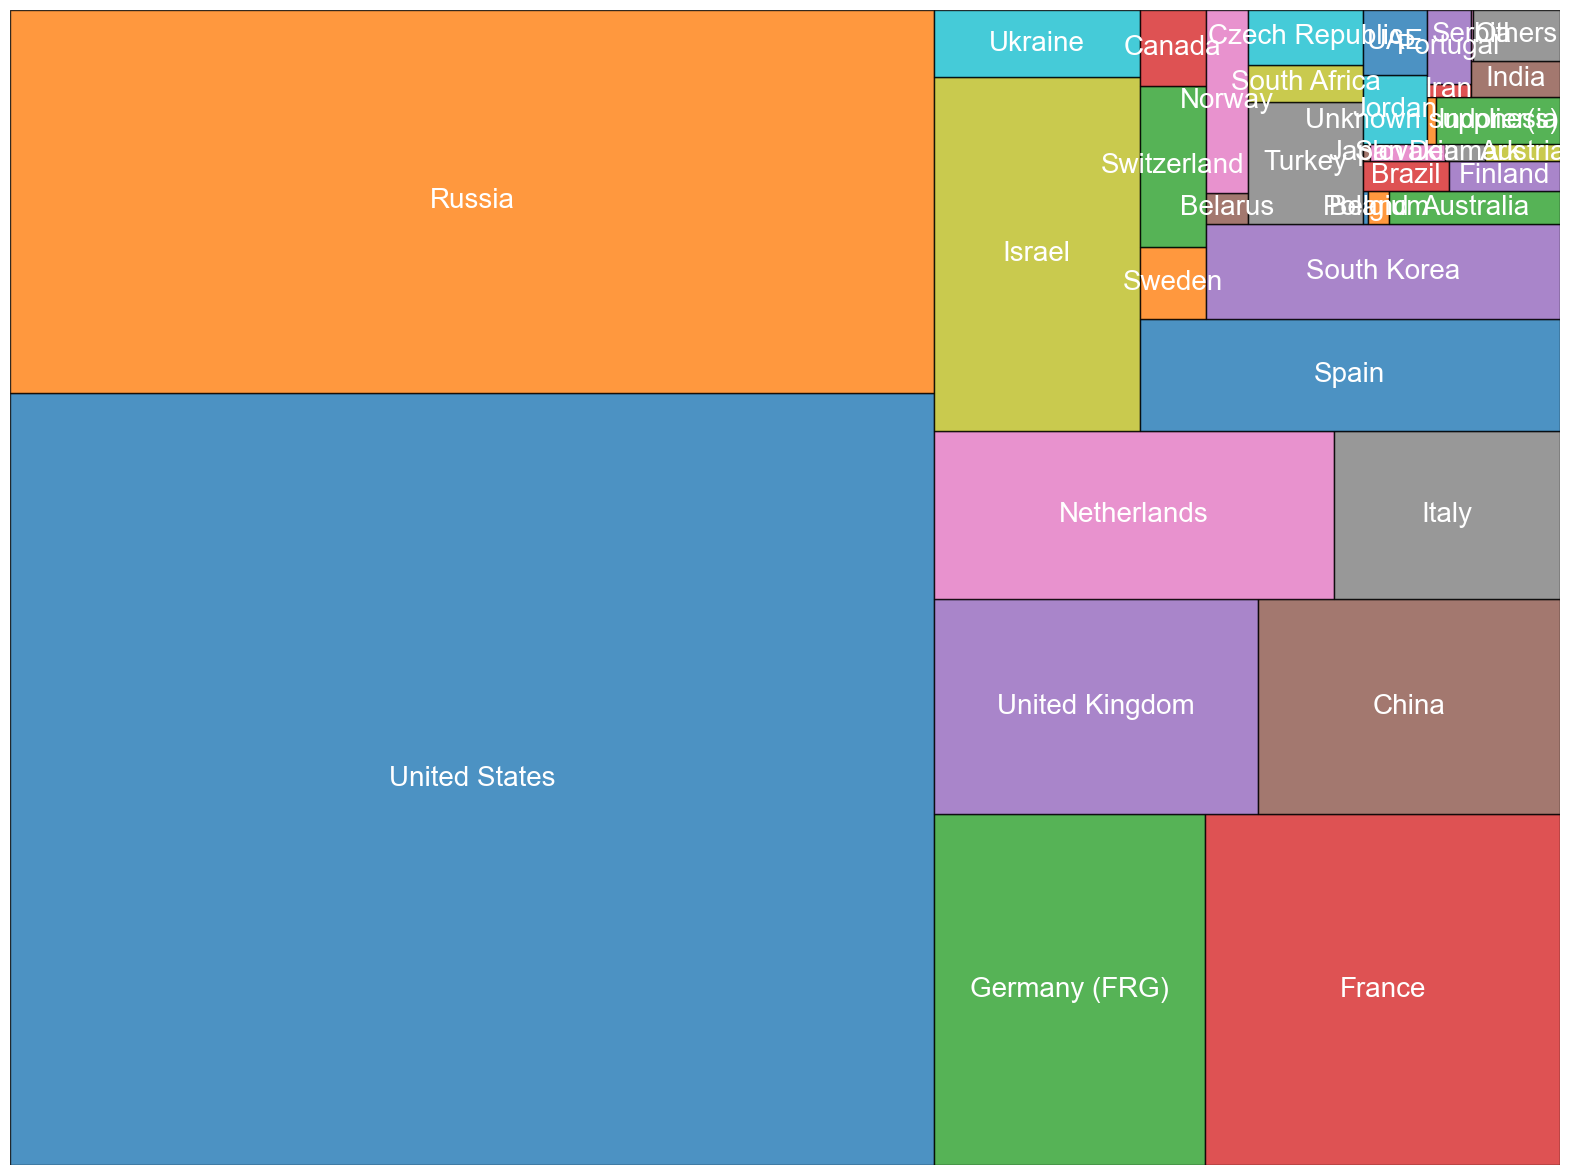

In [50]:
fig, ax = plt.subplots(figsize=(20,15))
squarify.plot(sizes=df['Value'], label=df['Country'],
              color=sns.color_palette("tab10", len(df)), ec='black',
              text_kwargs={'fontsize':20, 'color':'white'}, alpha=.8)
plt.axis('off')
plt.show()

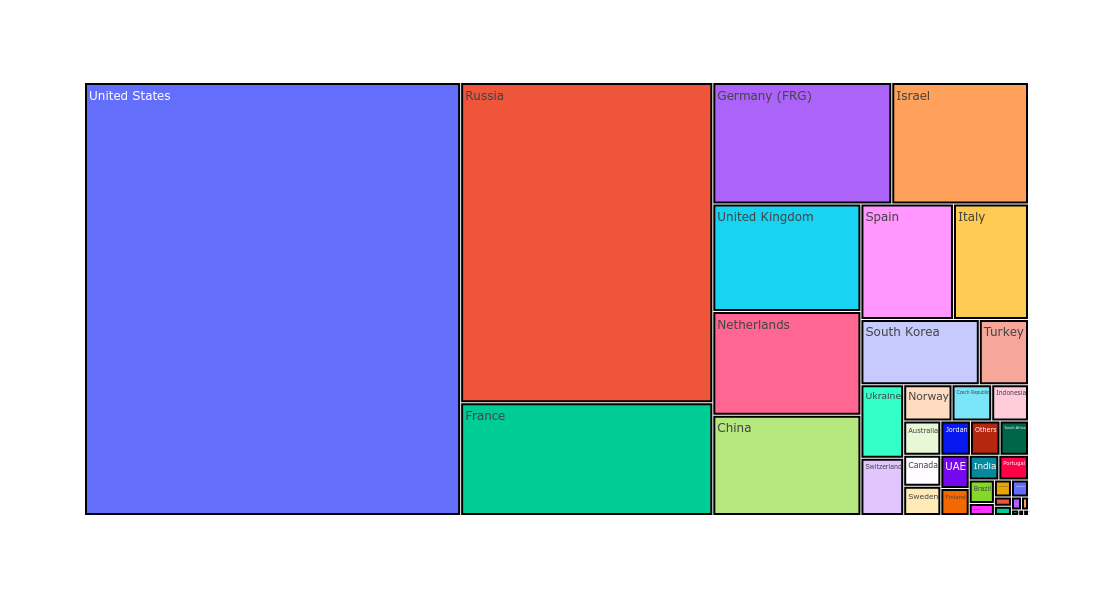

In [51]:
fig = px.treemap(df, path=['Country'], values='Value', title='', height=600, width=800)
fig.update_traces(marker={'line':{'color':'black', 'width':2}})
fig.update_traces(root_color='white')
fig.show()

## Circle packing

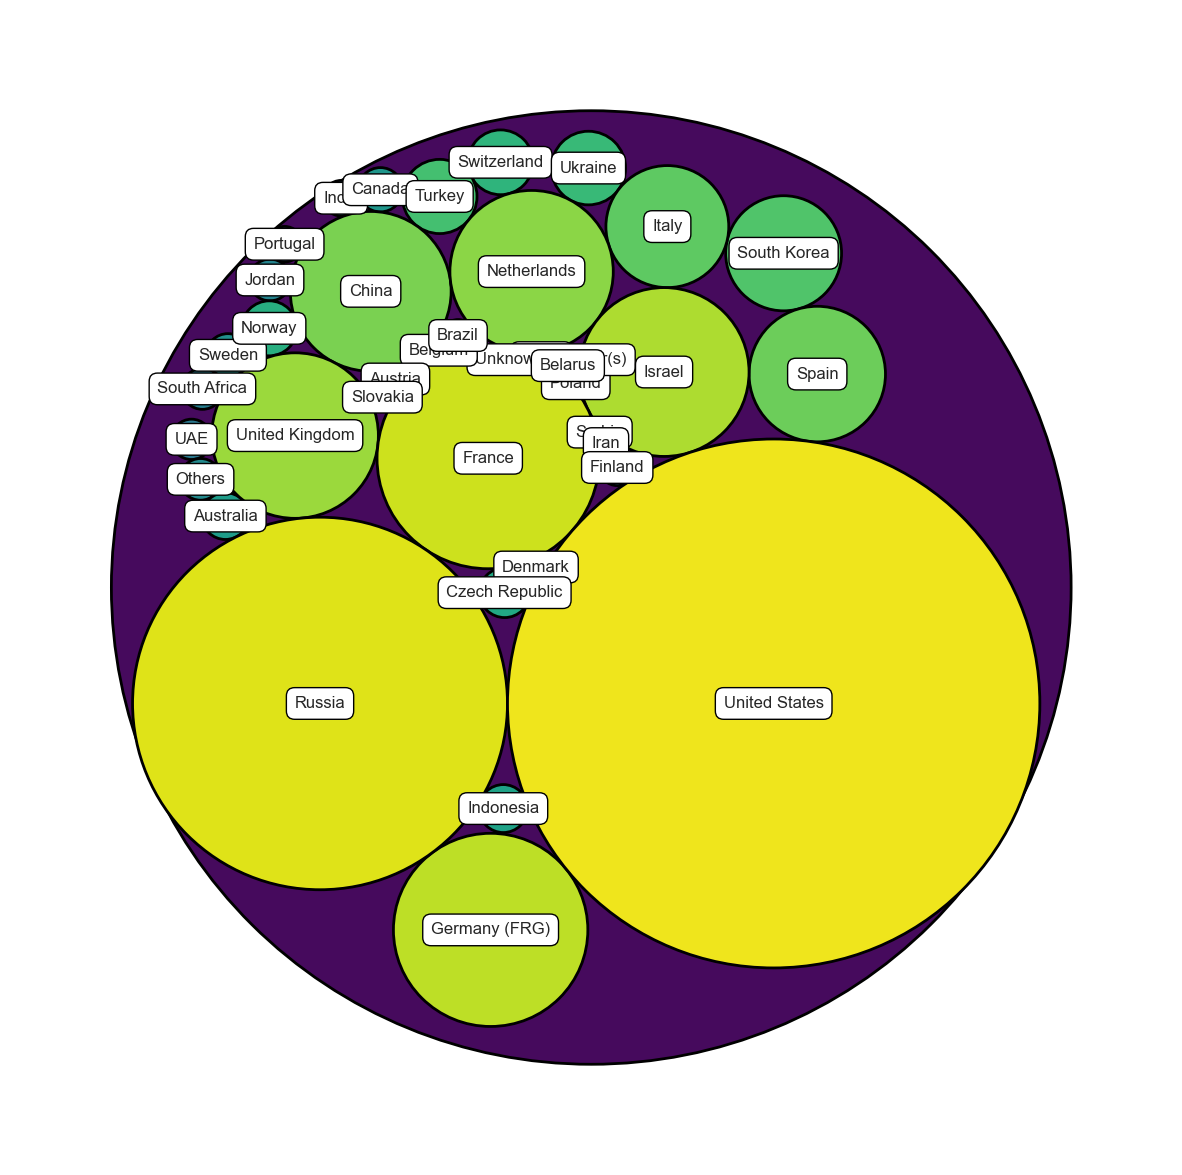

In [52]:
circles = circlify.circlify(
    ordereddf['Value'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')

lim = max(
    max(abs(circle.x) + circle.r, abs(circle.y) + circle.r)
    for circle in circles
)
nlim = lim+0.25
plt.xlim(-nlim, nlim)
plt.ylim(-nlim, nlim)
labels = ordereddf.Country

colors = sns.color_palette('viridis', len(df)+1)

ax.add_patch(plt.Circle((0,0), lim+0.04, alpha=1, linewidth=2, facecolor=colors[0], edgecolor="black"))

for circle, label, clr in zip(circles, labels, colors[1:]):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, linewidth=2, facecolor=clr, edgecolor="black"))
    plt.annotate(label, (x,y), va='center', ha='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))


---
# COMPARING RAPER LYRICS
---

In [53]:
df = pd.read_csv('datasets/SeveralIndepLists.csv', delimiter=' ')
df = df.dropna(axis=0)
df.word = list(map(lambda x:x.strip(), df.word))
df.reset_index(inplace=True, drop=True)
df

artist  song                       word
0       booba   113                paroles.net
1       booba   113                      above
2       booba   113                     lyrics
3       booba   113                   function
4       booba   113                        var
...       ...   ...                        ...
11445  nekfeu  squa               r.readystate
11446  nekfeu  squa       r.onreadystatechange
11447  nekfeu  squa                   r.onload
11448  nekfeu  squa  s.parentnode.insertbefore
11449  nekfeu  squa                          r

[11450 rows x 3 columns]

## Wordcloud

In [54]:
def unrelated(x):
    if '.' in x or '_' in x or len(x) <=1 or any(chr.isdigit() for chr in x):
        return True
    return False

In [55]:
# trying to drop out unnecessary or irrelevant words
df['temp'] = list(map(lambda x: np.nan if unrelated(x) else x, df.word))
df = df.dropna(axis=0)
df = df.drop('temp', axis=1)
df.reset_index(inplace=True, drop=True)

In [56]:
df[df.artist=='nekfeu'].word.unique()

array(['above', 'lyrics', 'function', 'var', 'opts', 'artist', 'nekfeu',
       'song', 'eg', 'div', 'id', 'if', 'typeof', 'undefined', 'else',
       'script', 'showads', 'loaded', 'complete', 'paroles', 'chanson',
       "n'crois", 'plus', "l'homme", "j'crois", 'parce', 'tue', "d'sang",
       'froid', 'vice', "qu'il", "n'y", "d'putes", "l'bois", 'veulent',
       "qu'on", 'taff', "y'a", "d'emplois", "s'battent", 'fasse', 'paix',
       "j'constate", "j'lutte", "l'noir", "l'temps", 'passe', "j'vois",
       "j'assiste", 'crash', 'car', 'quand', 'lice', 'po', 'craque',
       "n'braque", "d'aristocrates", 'false', 'true', 'eval',
       'medrectangle', 'settimeout', 'ezflaun', 'for', 'return',
       'machiavélique', 'raciste', 'clique', "m'avait", 'dit', 'jadis',
       "l'ami", 'si', 'souffres', 'temps', 'maquillera', 'cicatrices',
       "j'ai", 'piges', "j'écris", "c'est", 'triste', "d'être", 'comme',
       'vie', 'rétrécie', 'cause', "d'une", 'prise', 'électrique', 'biz',
      

In [57]:
# trying to identify other unrelated words
unrelated_words = ['var', 'function', 'false', 'true', 'typeof', 'undefined', 'else', 'cf_async', 'showads',
                   'loaded', 'complete', 'opts', 'if', 'script', 'artist', 'lyrics', 'div', 'id', 'song']

In [58]:
df['temp'] = list(map(lambda x: np.nan if (x in unrelated_words) else x, df.word))
df = df.dropna(axis=0)
df = df.drop('temp', axis=1)
df.reset_index(inplace=True, drop=True)

In [59]:
all_words_string = ' '.join(df[df.artist=='nekfeu'].word)
# all_words_string

In [60]:
wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color="white").generate(all_words_string)

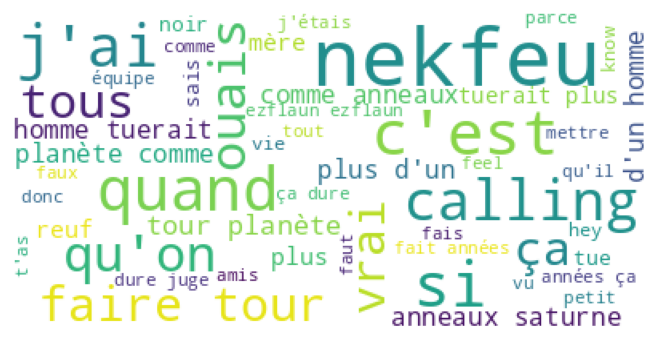

In [61]:
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

## Lollipop Chart

In [62]:
all_words = list(df[df.artist=='nekfeu'].word)
maxcounts = [(item, c) for items, c in Counter(all_words).most_common() for item in [items] * c]

countd = {}
for i,c in maxcounts:
    if len(countd) == 10:
        break
    countd[i] = c

word_list = [] 
count_list = []
for k,v in countd.items():
    word_list.append(k)
    count_list.append(v)

worddf = pd.DataFrame({'Word':word_list, 'Value':count_list})
worddf

Word  Value
0  nekfeu     25
1    plus     22
2   comme     20
3     you     17
4      ça     16
5      si     14
6   c'est     14
7   quand     13
8    j'ai     12
9    i'll     11

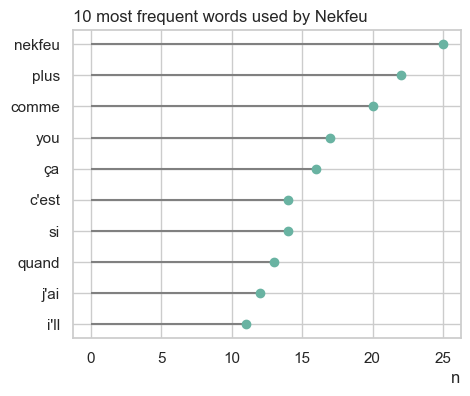

In [63]:
fig, ax = plt.subplots(figsize=(5,4))
worddf = worddf.sort_values(by='Value')
Range = range(1, len(worddf.index)+1)

plt.hlines(y=Range, xmin=0, xmax=worddf['Value'], color='grey')
plt.plot(worddf['Value'], Range, "o", color='#69b3a2')
plt.yticks(Range, worddf['Word'])
plt.xlabel('n', loc='right')
plt.title('10 most frequent words used by Nekfeu', loc='left')
plt.show()

## Venn diagram

In [64]:
df.artist.unique()

array(['booba', 'georges-brassens', 'nekfeu'], dtype=object)

In [65]:
s1 = set(df[df.artist=='booba'].word.unique())
s2 = set(df[df.artist=='georges-brassens'].word.unique())
s3 = set(df[df.artist=='nekfeu'].word.unique())

In [66]:
subsets = (len(s1), len(s3),  len(s1.intersection(s3)),
           len(s2), len(s2.intersection(s1)), len(s2.intersection(s3)),
           len(s1.intersection(s2).intersection(s3)))

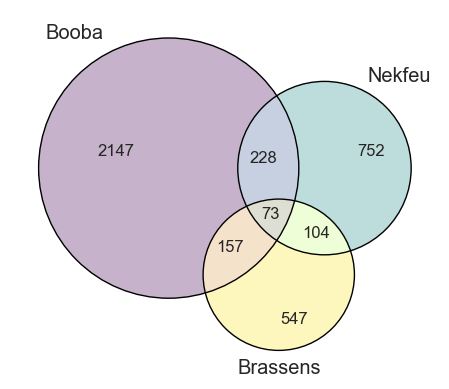

In [67]:
v = venn3(subsets=subsets,
      set_labels = ('Booba', 'Nekfeu', 'Brassens'),
      set_colors=("#440154ff","#21908dff","#fde725ff"), alpha=0.3,
)

c = venn3_circles(subsets=subsets, linewidth=1)

plt.show()

---
# VISUALIZING THE WORLD POPULATION
---

In [68]:
df = pd.read_csv('datasets/SevCatOneNumNestedOneObsPerGroup.csv', delimiter=';')
df = df.replace(np.nan, '')
df.reset_index(inplace=True, drop=True)
df['general'] = ''
df

region        subregion                key     value general
0       Asia    Southern Asia        Afghanistan  25500100        
1     Europe  Northern Europe      Åland Islands     28502        
2     Europe  Southern Europe            Albania   2821977        
3     Africa  Northern Africa            Algeria  37900000        
4    Oceania        Polynesia     American Samoa     55519        
..       ...              ...                ...       ...     ...
245  Oceania        Polynesia  Wallis and Futuna     13135        
246   Africa  Northern Africa     Western Sahara    567000        
247     Asia     Western Asia              Yemen  24527000        
248   Africa   Eastern Africa             Zambia  13092666        
249   Africa   Eastern Africa           Zimbabwe  12973808        

[250 rows x 5 columns]

In [69]:
# regions = df.region.to_list()
# subregions = df.subregion.to_list()
# keys = df.key.to_list()
# values = df.value.to_list()

# Values, Labels, Parents = [], [], []
# Values = [0]*(len(regions) + len(subregions)) + values
# Labels = regions + subregions + keys
# Parents = subregions + regions + [""]*len(regions)

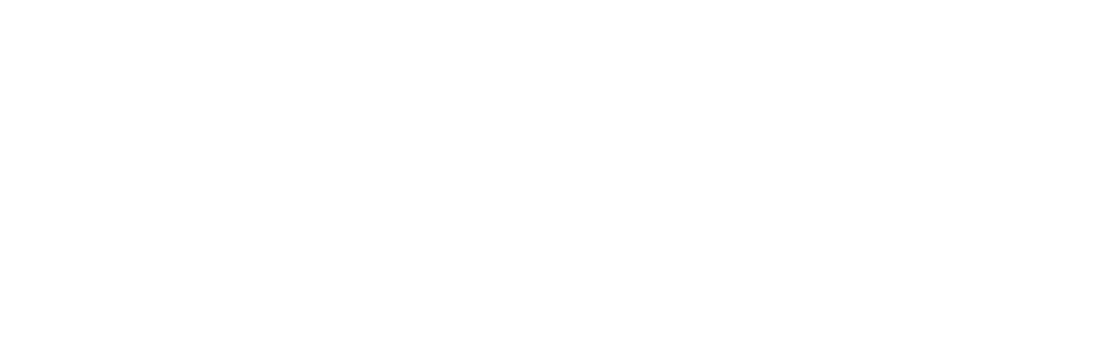

In [70]:
fig = px.treemap(df, path=['general', 'region', 'subregion', 'key'], values='value')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

---
# THE GENDER WAGE GAP
---

In [71]:
df = pd.read_csv('datasets/OneNumSevCatSubgroupOneObs.csv')
# df = df.dropna(axis=1)
df

Country  TIME  Value
0          Australia  2000   17.2
1          Australia  2005   15.8
2          Australia  2010   14.0
3          Australia  2015   13.0
4            Austria  2000   23.1
5            Austria  2005   22.0
6            Austria  2010   19.2
7            Austria  2015   17.0
8            Belgium  2000   13.6
9            Belgium  2005   11.5
10           Belgium  2010    7.0
11           Belgium  2015    4.7
12            Canada  2000   23.9
13            Canada  2005   21.3
14            Canada  2010   19.0
15            Canada  2015   18.6
16             Chile  2000    6.1
17             Chile  2015   21.1
18          Colombia  2010    6.4
19          Colombia  2015   11.1
20        Costa Rica  2015    3.7
21        Costa Rica  2010    0.0
22    Czech Republic  2000   19.1
23    Czech Republic  2005   15.9
24    Czech Republic  2010   15.8
25    Czech Republic  2015   16.5
26           Denmark  2005   10.2
27           Denmark  2010    8.9
28           Denmark  2015    5.8
29           Estonia  2010   27.8
30           Finland  2000   20.4
31           Finland  2005   18.9
32           Finland  2010   18.9
33           Finland  2015   18.1
34            France  2010    9.1
35           Germany  2000   19.6
36           Germany  2005   16.3
37           Germany  2010   16.7
38           Germany  2015   15.8
39            Greece  2005   16.7
40            Greece  2010   12.2
41            Greece  2015    6.3
42           Hungary  2000   14.1
43           Hungary  2005    4.0
44           Hungary  2010    6.4
45           Hungary  2015    9.5
46           Iceland  2005   13.2
47           Iceland  2010   14.3
48           Iceland  2015    9.9
49           Ireland  2000   19.7
50           Ireland  2005   13.8
51           Ireland  2010   12.8
52           Ireland  2015   14.4
53            Israel  2005   22.9
54            Israel  2010   20.1
55            Israel  2015   19.3
56             Italy  2000    8.5
57             Italy  2010    9.9
58             Japan  2000   33.9
59             Japan  2005   32.8
60             Japan  2010   28.7
61             Japan  2015   25.7
62             Korea  2000   41.7
63             Korea  2005   39.6
64             Korea  2010   39.6
65             Korea  2015   37.2
66            Latvia  2010   19.1
67         Lithuania  2010   10.6
68        Luxembourg  2010    4.6
69            Mexico  2005   16.7
70            Mexico  2010   11.6
71            Mexico  2015   16.7
72       Netherlands  2010   17.9
73       New Zealand  2000    7.2
74       New Zealand  2005    9.6
75       New Zealand  2010    7.0
76       New Zealand  2015    7.9
77            Norway  2000   10.2
78            Norway  2005    9.4
79            Norway  2010    8.1
80            Norway  2015    7.1
81    OECD - Average  2000   17.8
82    OECD - Average  2005   15.6
83    OECD - Average  2010   14.5
84    OECD - Average  2015   14.3
85            Poland  2005   11.0
86            Poland  2010    7.2
87          Portugal  2005   16.0
88          Portugal  2010   13.5
89          Portugal  2015   18.9
90   Slovak Republic  2005   20.1
91   Slovak Republic  2010   14.9
92   Slovak Republic  2015   13.4
93          Slovenia  2010    1.0
94             Spain  2005   12.5
95             Spain  2010   13.5
96            Sweden  2000   15.5
97            Sweden  2005   14.4
98            Sweden  2010   14.3
99       Switzerland  2000   23.8
100      Switzerland  2010   20.1
101           Turkey  2010    3.1
102   United Kingdom  2000   26.3
103   United Kingdom  2005   22.1
104   United Kingdom  2010   19.2
105   United Kingdom  2015   17.1
106    United States  2000   23.1
107    United States  2005   19.0
108    United States  2010   18.8
109    United States  2015   18.9

In [72]:
countries = sorted(df.Country.unique())
# countries

In [73]:
country_indexdict = {countries[each]:each for each in range(len(countries))}
rev_country_indexdict = {each:countries[each] for each in range(len(countries))}

In [74]:
years = sorted(df.TIME.unique())
years

[2000, 2005, 2010, 2015]

In [75]:
df = df.sort_values(by='Value')

In [76]:
countryd = {}
for c in countries:
    countryd[country_indexdict[c]] = {'country':c}

for each in range(len(df)):
    temp = df.iloc[each]
    countryd[country_indexdict[temp.Country]][str(temp.TIME)] = temp.Value
    del temp
    
torem = []
remainingc = []
for each in countryd:
    if len(countryd[each]) < 5:
        torem.append(each)
    else:
        remainingc.append(countryd[each]['country'])
        del countryd[each]['country']
        
for each in torem:
    del countryd[each]

# countryd

In [77]:
remainingc

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Czech Republic',
 'Finland',
 'Germany',
 'Hungary',
 'Ireland',
 'Japan',
 'Korea',
 'New Zealand',
 'Norway',
 'OECD - Average',
 'United Kingdom',
 'United States']

In [78]:
countrydf = pd.DataFrame(countryd).transpose()
countrydf.index = remainingc
countrydf = countrydf.sort_values(by='2000')

In [79]:
year_colors = {}
cp = sns.color_palette('viridis', len(years)).as_hex()
for each in range(4):
    year_colors[str(years[each])] = cp[each]

## Grouped barplot

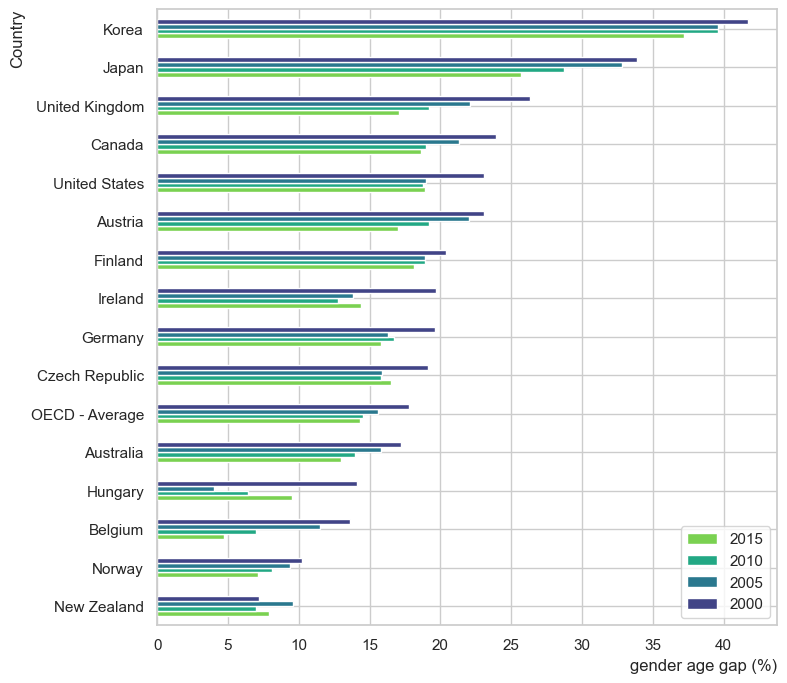

In [80]:
countrydf.plot.barh(color=year_colors, figsize=(8,8))
plt.xlabel('gender age gap (%)', loc='right')
plt.ylabel('Country', loc='top')
plt.show()

In [81]:
rev_countryd = {}
for each in countryd:
    rev_countryd[rev_country_indexdict[each]] = countryd[each]
# rev_countryd

In [82]:
rev_countrydf = pd.DataFrame(rev_countryd)
rev_countrydf

Australia  Austria  Belgium  Canada  Czech Republic  Finland  Germany   
2015       13.0     17.0      4.7    18.6            16.5     18.1     15.8  \
2010       14.0     19.2      7.0    19.0            15.8     18.9     16.7   
2005       15.8     22.0     11.5    21.3            15.9     18.9     16.3   
2000       17.2     23.1     13.6    23.9            19.1     20.4     19.6   

      Hungary  Ireland  Japan  Korea  New Zealand  Norway  OECD - Average   
2015      9.5     14.4   25.7   37.2          7.9     7.1            14.3  \
2010      6.4     12.8   28.7   39.6          7.0     8.1            14.5   
2005      4.0     13.8   32.8   39.6          9.6     9.4            15.6   
2000     14.1     19.7   33.9   41.7          7.2    10.2            17.8   

      United Kingdom  United States  
2015            17.1           18.9  
2010            19.2           18.8  
2005            22.1           19.0  
2000            26.3           23.1

In [83]:
year_colors = {}
cp = sns.color_palette('viridis', len(remainingc)).as_hex()
for each in range(len(remainingc)):
    year_colors[remainingc[each]] = cp[each]

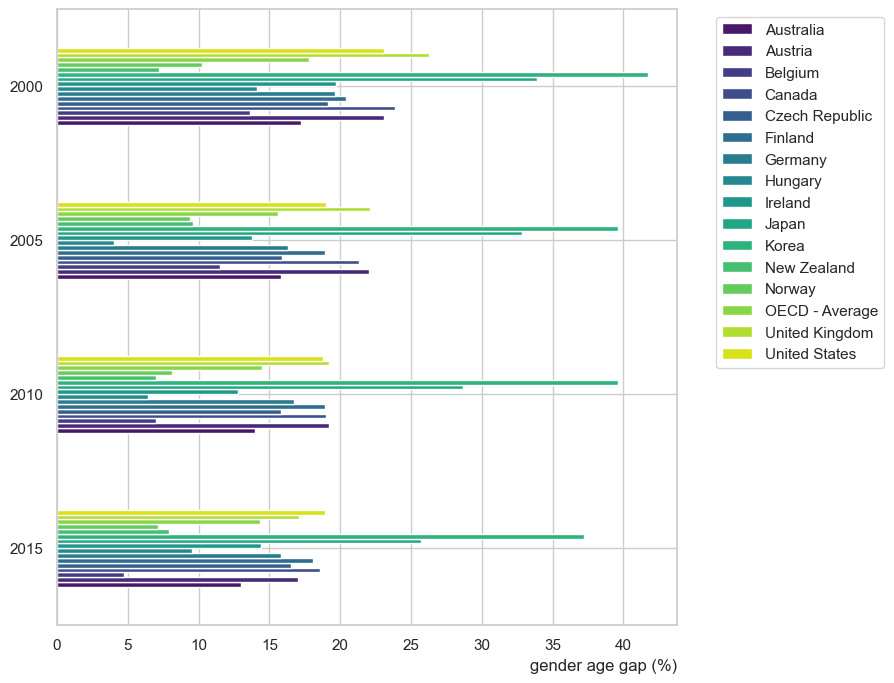

In [84]:
rev_countrydf.plot.barh(color=year_colors, figsize=(8,8))
plt.xlabel('gender age gap (%)', loc='right')
plt.ylabel('', loc='top')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Parallel coordinates plot

In [85]:
tempdf = pd.DataFrame(countryd).transpose()
tempdf.reset_index(inplace=True, drop=True)
tempdf = tempdf[['2000', '2005', '2010', '2015']]
tempdf['country'] = remainingc
# tempdf

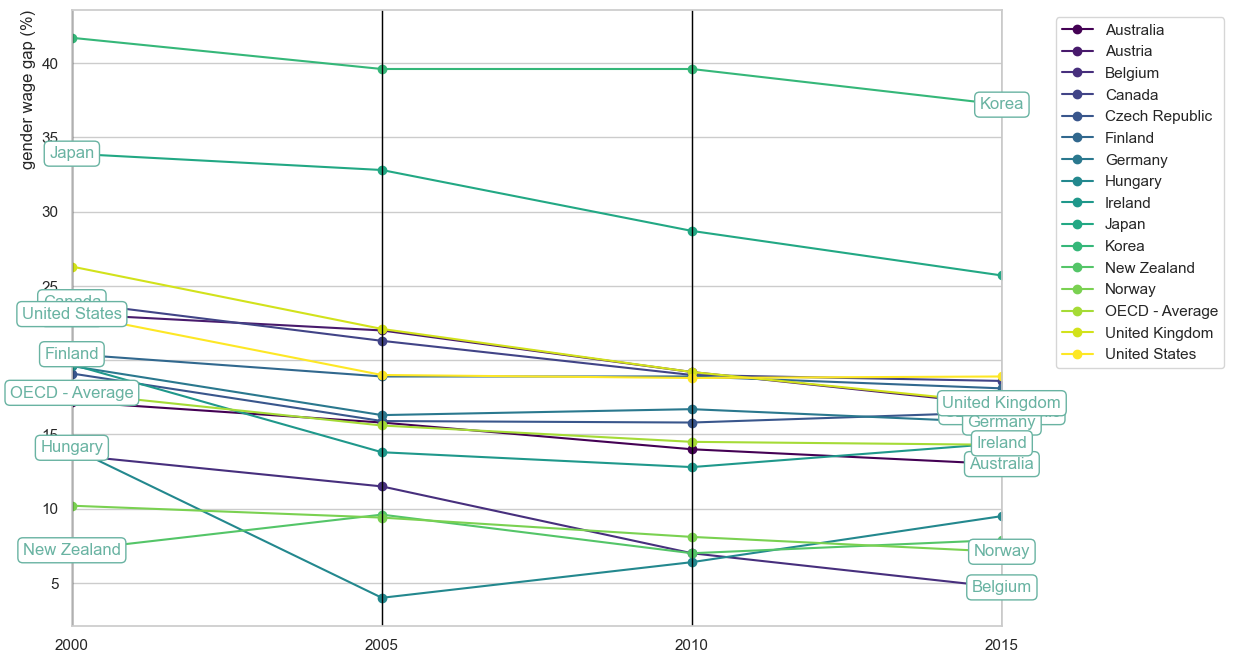

In [86]:
fig, ax = plt.subplots(figsize=(12,8))
parallel_coordinates(tempdf, 'country', colormap=plt.get_cmap('viridis'), marker='o', ax=ax)
ax.set_ylabel('gender wage gap (%)', loc='top')

for each in range(len(remainingc)):
    if each%2:
        plt.text(0, tempdf['2000'][each], remainingc[each], color='#69b3a2',
            verticalalignment='center', horizontalalignment='center',
            bbox={'facecolor':'white', 'alpha':1, 'edgecolor':'#69b3a2', 'boxstyle':'round'}
        )
    else:
        plt.text(3, tempdf['2015'][each], remainingc[each], color='#69b3a2',
            verticalalignment='center', horizontalalignment='center',
            bbox={'facecolor':'white', 'alpha':1, 'edgecolor':'#69b3a2', 'boxstyle':'round'}
        ) 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.gca().legend_.remove()
plt.grid()
plt.show()

## Slope chart

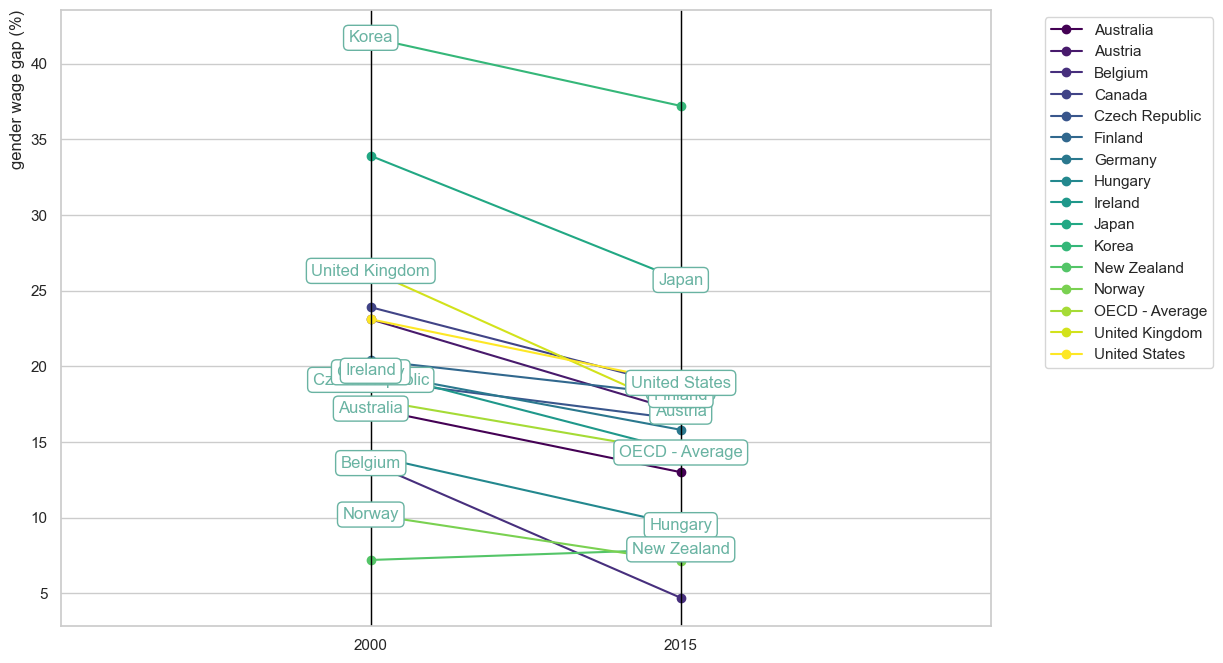

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
parallel_coordinates(tempdf[['country', '2000', '2015']], 'country', colormap=plt.get_cmap('viridis'), marker='o', ax=ax)
ax.set_ylabel('gender wage gap (%)', loc='top')

for each in range(len(remainingc)):
    if not each%2:
        plt.text(0, tempdf['2000'][each], remainingc[each], color='#69b3a2',
            verticalalignment='center', horizontalalignment='center',
            bbox={'facecolor':'white', 'alpha':1, 'edgecolor':'#69b3a2', 'boxstyle':'round'}
        )
    else:
        plt.text(1, tempdf['2015'][each], remainingc[each], color='#69b3a2',
            verticalalignment='center', horizontalalignment='center',
            bbox={'facecolor':'white', 'alpha':1, 'edgecolor':'#69b3a2', 'boxstyle':'round'}
        ) 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlim([-1,2])
plt.grid()
plt.show()

## Scatter plot

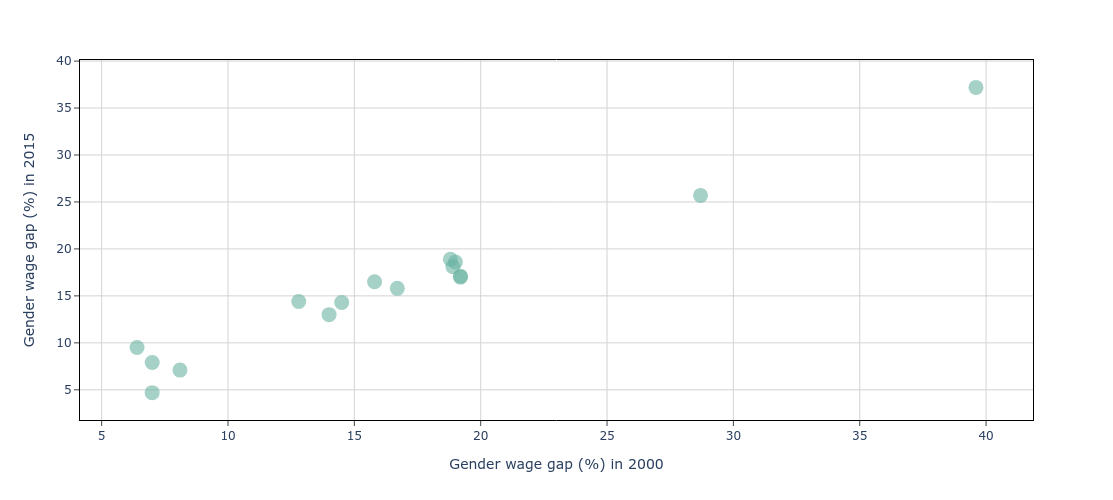

In [88]:
fig = px.scatter(tempdf, x="2010", y="2015", color="country", color_discrete_sequence=['#69b3a2'], width=800, height=500)
fig.update_traces(marker={'size':15, 'opacity':0.6})
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    yaxis_title='Gender wage gap (%) in 2015',
    xaxis_title='Gender wage gap (%) in 2000',
    title={'text': ''}
)

fig.show()

---
# RESEARCHERS NETWORK AND MIGRATION FLOWS
---

In [89]:
df = pd.read_csv('datasets/AdjacencyDirectedWeighted.csv')
df

from               to     value
0            Africa           Africa  3.142471
1         East Asia           Africa  0.000000
2            Europe           Africa  0.000000
3     Latin America           Africa  0.000000
4     North America           Africa  0.000000
5           Oceania           Africa  0.000000
6        South Asia           Africa  0.000000
7   South East Asia           Africa  0.000000
8      Soviet Union           Africa  0.000000
9         West Asia           Africa  0.000000
10           Africa        East.Asia  0.000000
11        East Asia        East.Asia  1.630997
12           Europe        East.Asia  0.000000
13    Latin America        East.Asia  0.000000
14    North America        East.Asia  0.000000
15          Oceania        East.Asia  0.000000
16       South Asia        East.Asia  0.525881
17  South East Asia        East.Asia  0.145264
18     Soviet Union        East.Asia  0.000000
19        West Asia        East.Asia  0.000000
20           Africa           Europe  2.107883
21        East Asia           Europe  0.601265
22           Europe           Europe  2.401476
23    Latin America           Europe  1.762587
24    North America           Europe  1.215929
25          Oceania           Europe  0.170370
26       South Asia           Europe  1.390272
27  South East Asia           Europe  0.468762
28     Soviet Union           Europe  0.609230
29        West Asia           Europe  0.449623
30           Africa    Latin.America  0.000000
31        East Asia    Latin.America  0.000000
32           Europe    Latin.America  0.000000
33    Latin America    Latin.America  0.879198
34    North America    Latin.America  0.276908
35          Oceania    Latin.America  0.000000
36       South Asia    Latin.America  0.000000
37  South East Asia    Latin.America  0.000000
38     Soviet Union    Latin.America  0.000000
39        West Asia    Latin.America  0.000000
40           Africa    North.America  0.540887
41        East Asia    North.America  0.973060
42           Europe    North.America  0.000000
43    Latin America    North.America  3.627847
44    North America    North.America  0.000000
45          Oceania    North.America  0.000000
46       South Asia    North.America  1.508008
47  South East Asia    North.America  1.057904
48     Soviet Union    North.America  0.000000
49        West Asia    North.America  0.169274
50           Africa          Oceania  0.155988
51        East Asia          Oceania  0.333608
52           Europe          Oceania  0.000000
53    Latin America          Oceania  0.000000
54    North America          Oceania  0.000000
55          Oceania          Oceania  0.190706
56       South Asia          Oceania  0.347420
57  South East Asia          Oceania  0.278746
58     Soviet Union          Oceania  0.000000
59        West Asia          Oceania  0.000000
60           Africa       South.Asia  0.000000
61        East Asia       South.Asia  0.000000
62           Europe       South.Asia  0.000000
63    Latin America       South.Asia  0.000000
64    North America       South.Asia  0.000000
65          Oceania       South.Asia  0.000000
66       South Asia       South.Asia  1.307907
67  South East Asia       South.Asia  0.000000
68     Soviet Union       South.Asia  0.000000
69        West Asia       South.Asia  0.000000
70           Africa  South.East.Asia  0.000000
71        East Asia  South.East.Asia  0.380388
72           Europe  South.East.Asia  0.000000
73    Latin America  South.East.Asia  0.000000
74    North America  South.East.Asia  0.000000
75          Oceania  South.East.Asia  0.000000
76       South Asia  South.East.Asia  0.000000
77  South East Asia  South.East.Asia  0.781316
78     Soviet Union  South.East.Asia  0.000000
79        West Asia  South.East.Asia  0.000000
80           Africa     Soviet.Union  0.000000
81        East Asia     Soviet.Union  0.000000
82           Europe     Soviet.Union  0.000000
83    Latin America     Soviet.Union  0.000000
84    North America 

In [90]:
df.to = list(map(lambda x:x.replace('.', ' '), df.to))
df.to.unique()

array(['Africa', 'East Asia', 'Europe', 'Latin America', 'North America',
       'Oceania', 'South Asia', 'South East Asia', 'Soviet Union',
       'West Asia'], dtype=object)

In [91]:
df['from'].unique()

array(['Africa', 'East Asia', 'Europe', 'Latin America', 'North America',
       'Oceania', 'South Asia', 'South East Asia', 'Soviet Union',
       'West Asia'], dtype=object)

In [92]:
labeld = {}
for idx, each in enumerate(sorted(df['from'].unique())):
    labeld[each] = idx
labeld

{'Africa': 0,
 'East Asia': 1,
 'Europe': 2,
 'Latin America': 3,
 'North America': 4,
 'Oceania': 5,
 'South Asia': 6,
 'South East Asia': 7,
 'Soviet Union': 8,
 'West Asia': 9}

In [93]:
source = list(map(lambda x:labeld[x], df['from']))
target = list(map(lambda x:labeld[x], df.to))

## Sankey diagram

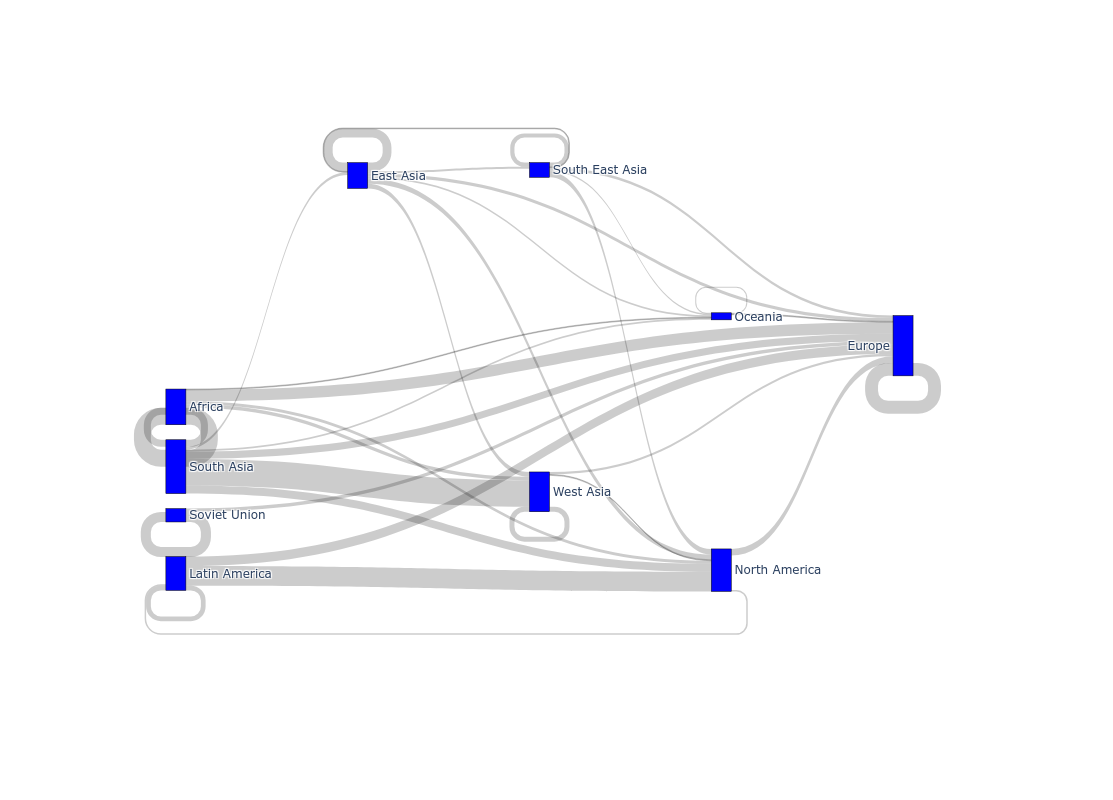

In [94]:
fig = go.Figure(data=[go.Sankey(
    node = dict(pad=15, thickness=20, line=dict(color="black", width=0.5),
      label=sorted(df['from'].unique()),
      color="blue"
    ),
    link = dict(source=source, target=target, value=df.value),
  )])
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

## Heatmap

In [95]:
continents = sorted(df.to.unique())
continents

['Africa',
 'East Asia',
 'Europe',
 'Latin America',
 'North America',
 'Oceania',
 'South Asia',
 'South East Asia',
 'Soviet Union',
 'West Asia']

In [96]:
contd = {}
for c in continents:
    contd[c] = {}

for i in range(len(df)):
    t,f = df.iloc[i].to, df.iloc[i]['from']
    contd[f][t] = df.iloc[i].value

contd

{'Africa': {'Africa': 3.142471,
  'East Asia': 0.0,
  'Europe': 2.107883,
  'Latin America': 0.0,
  'North America': 0.540887,
  'Oceania': 0.155988,
  'South Asia': 0.0,
  'South East Asia': 0.0,
  'Soviet Union': 0.0,
  'West Asia': 0.673004},
 'East Asia': {'Africa': 0.0,
  'East Asia': 1.630997,
  'Europe': 0.601265,
  'Latin America': 0.0,
  'North America': 0.97306,
  'Oceania': 0.333608,
  'South Asia': 0.0,
  'South East Asia': 0.380388,
  'Soviet Union': 0.0,
  'West Asia': 0.869311},
 'Europe': {'Africa': 0.0,
  'East Asia': 0.0,
  'Europe': 2.401476,
  'Latin America': 0.0,
  'North America': 0.0,
  'Oceania': 0.0,
  'South Asia': 0.0,
  'South East Asia': 0.0,
  'Soviet Union': 0.0,
  'West Asia': 0.0},
 'Latin America': {'Africa': 0.0,
  'East Asia': 0.0,
  'Europe': 1.762587,
  'Latin America': 0.879198,
  'North America': 3.627847,
  'Oceania': 0.0,
  'South Asia': 0.0,
  'South East Asia': 0.0,
  'Soviet Union': 0.0,
  'West Asia': 0.0},
 'North America': {'Africa': 0.0

In [97]:
cmat = []
for c in continents:
    cmat.append([ contd[c][d] for d in continents ])

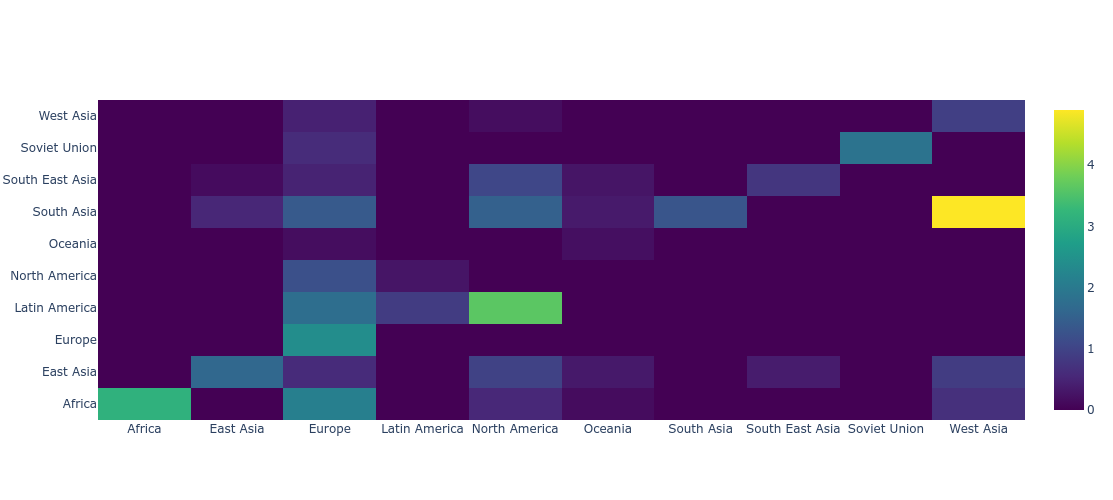

In [98]:
fig = go.Figure(data=go.Heatmap(x=continents, y=continents, z=cmat, type = 'heatmap', colorscale = 'Viridis'))
fig.update_layout(width=500, height=500)
fig.show()

In [99]:
df = pd.read_csv('datasets/AdjacencyUndirectedUnweighted.csv', delimiter=' ')
df = df.fillna(0)

In [100]:
From = []
To = []

for i in range(len(df)):
    from_person = df.iloc[i]['from']
    temp = df.iloc[i].to_dict()
    del temp['from']
    
    for k in temp:
        if temp[k] == 1:
            From.append(from_person)
            To.append(k)
            
netdf = pd.DataFrame({'From':From, 'To':To})
netdf

From            To
0     A Armero       A Breil
1     A Armero    A Dereeper
2     A Armero  F De Lamotte
3     A Armero    FC Baurens
4     A Armero        G Droc
..         ...           ...
400   Y Moreau      D Durand
401  Z Shahzad     B Martret
402  Z Shahzad     C Fizames
403  Z Shahzad  J Alassimone
404  Z Shahzad     L Marquès

[405 rows x 2 columns]

## Network

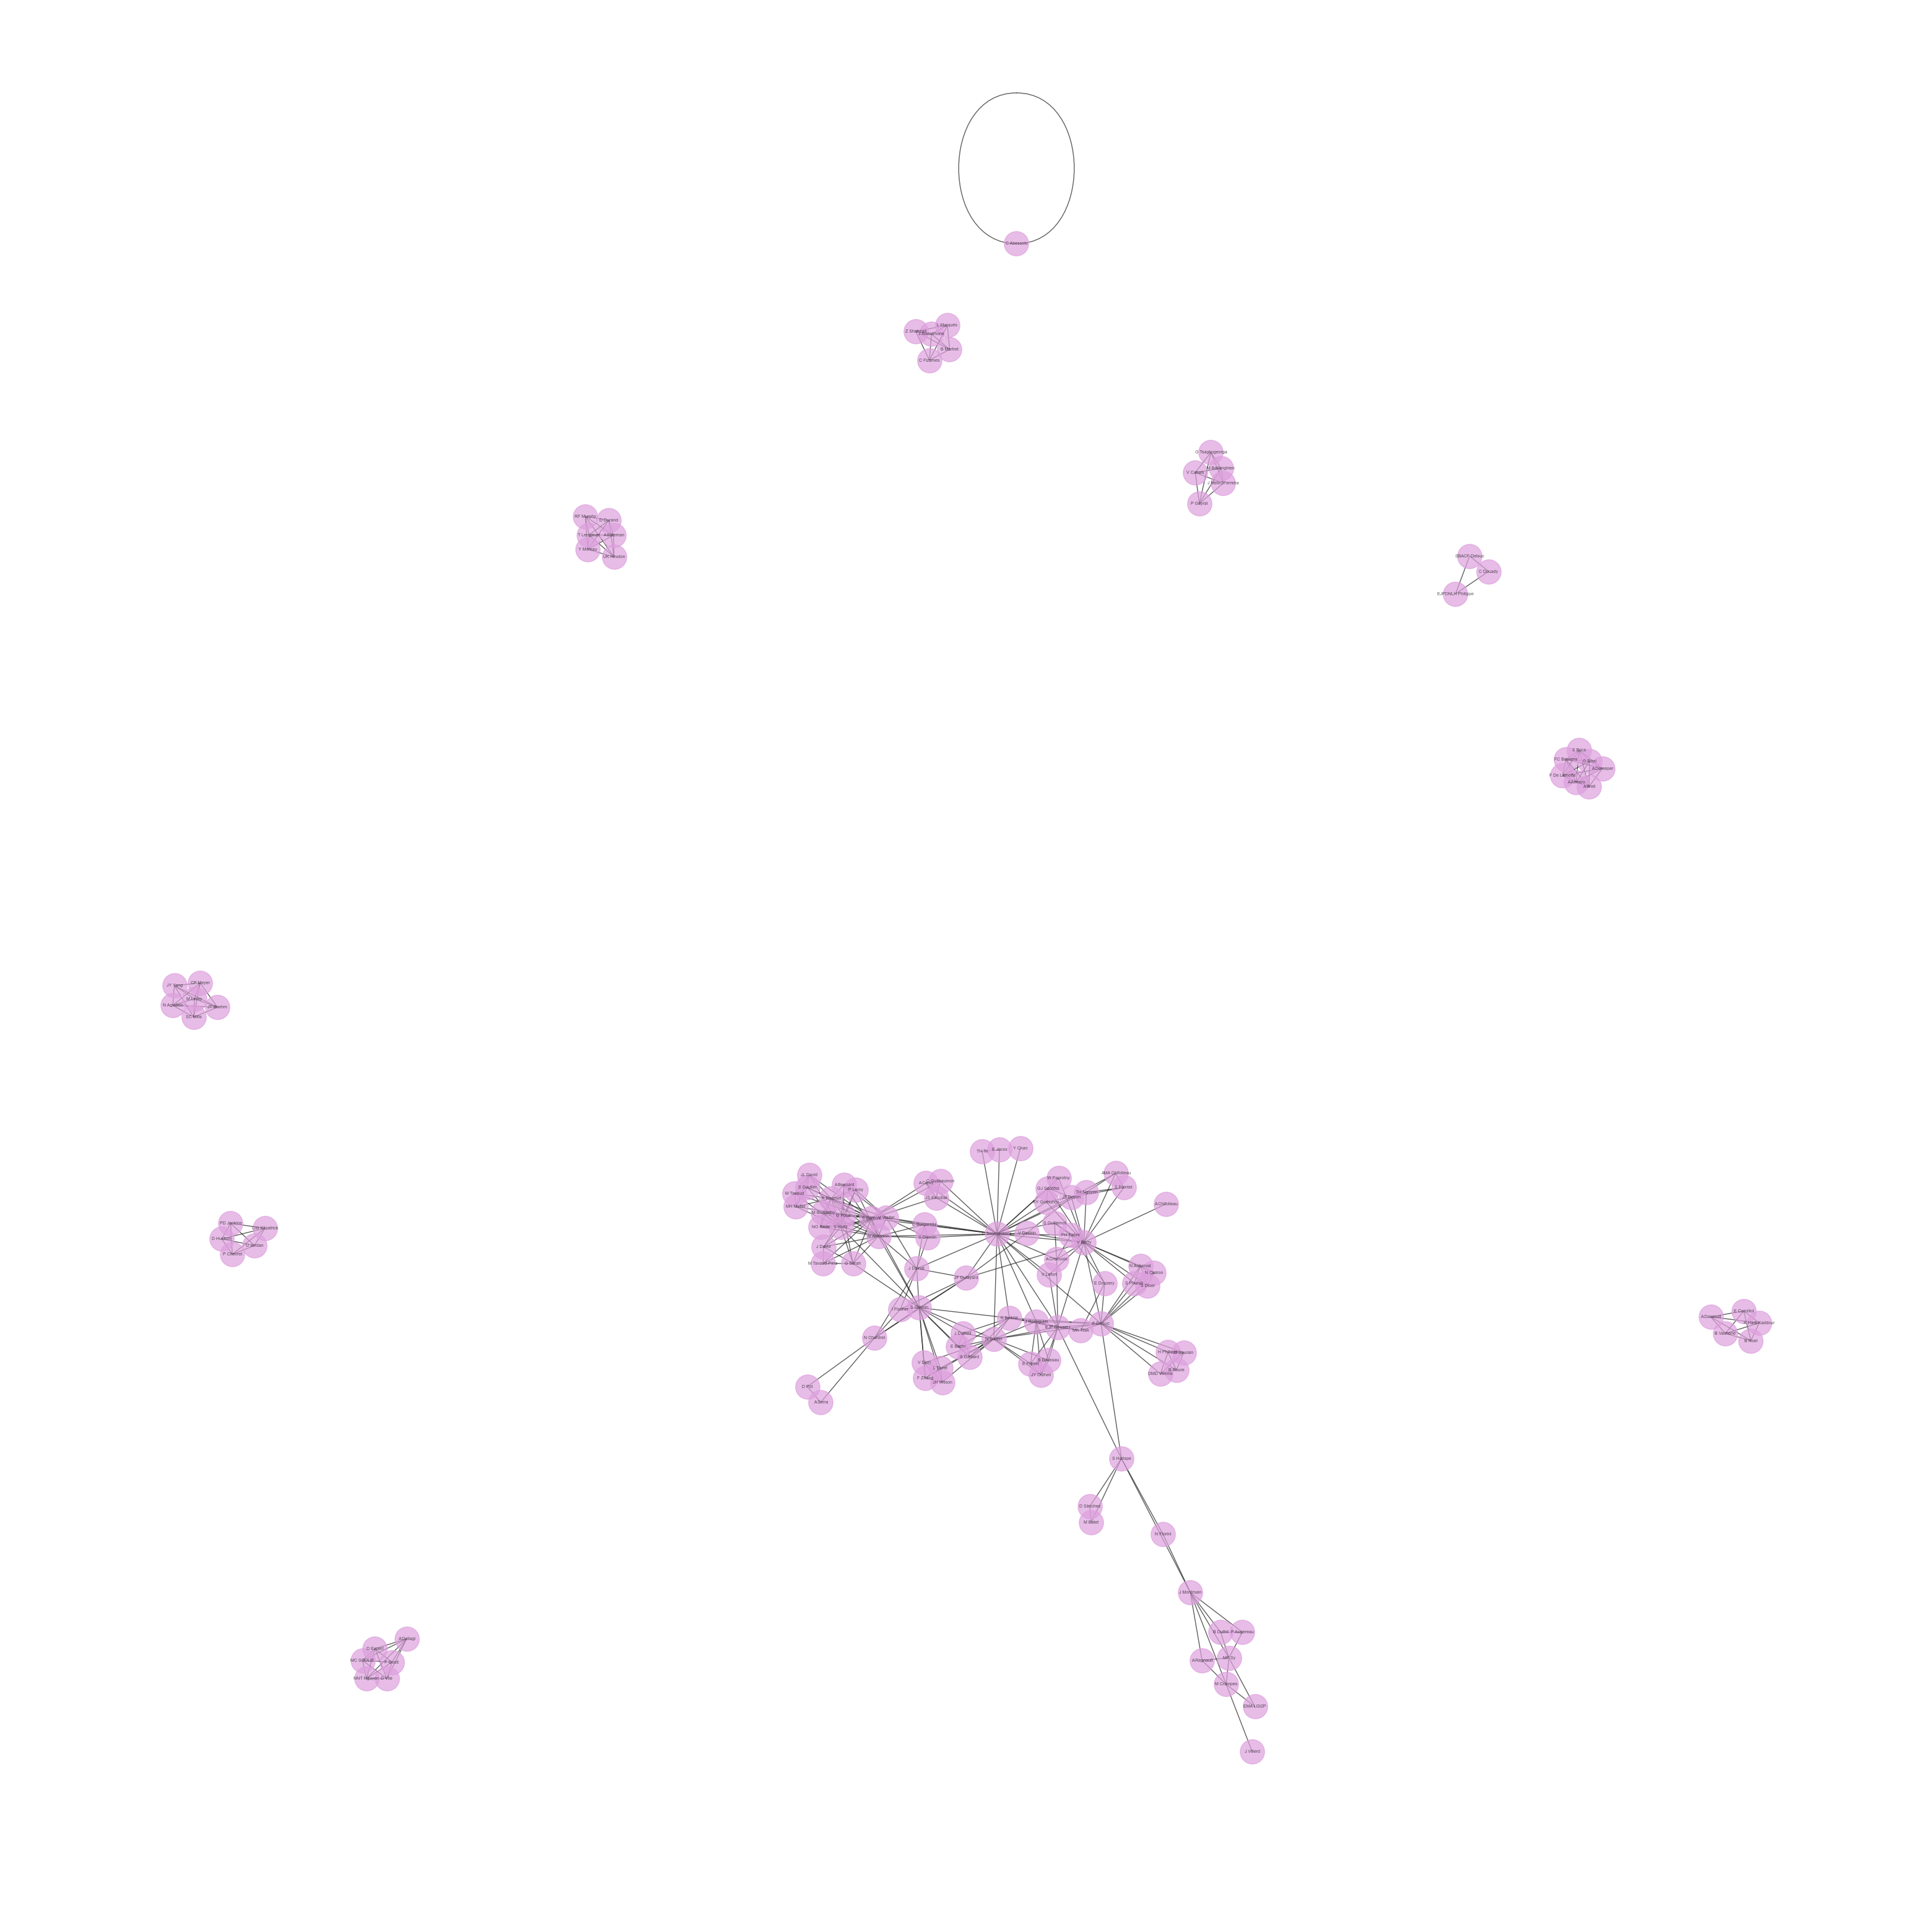

In [101]:
fig, ax = plt.subplots(figsize=(40,40))
G = nx.from_pandas_edgelist(netdf, 'From', 'To')
pos = nx.spring_layout(G,  k=0.15, scale=2000)
nx.draw(G, with_labels=True, node_color="plum", font_size=5, alpha=0.7, node_size=800)
plt.show()

---
# HOW MUCH DO PEOPLE TIP?

---

In [102]:
df = pd.read_csv('datasets/OneNumSevCatSubgroupsSevObs.csv')
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [103]:
sns.color_palette("Paired").as_hex()[2]

'#b2df8a'

## Grouped boxplot

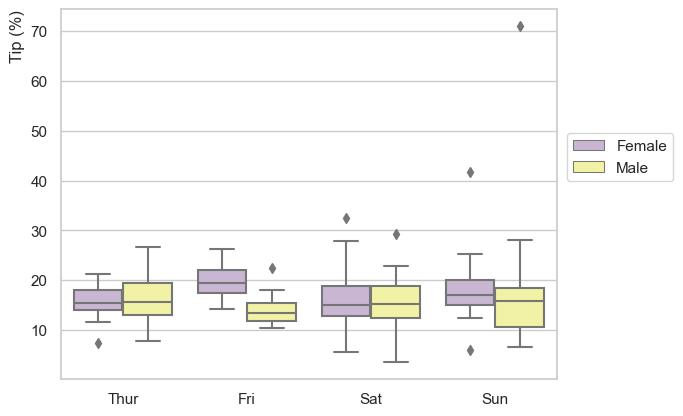

In [104]:
sns.boxplot(df, x='day', y=df.tip/df.total_bill*100, hue='sex',
           palette=['#cab2d6', '#ffff99'], order=['Thur', 'Fri', 'Sat', 'Sun'])

plt.legend(bbox_to_anchor=(1.25, 0.6), loc='center right')
plt.xlabel('')
plt.ylabel('Tip (%)', loc='top')
plt.show()

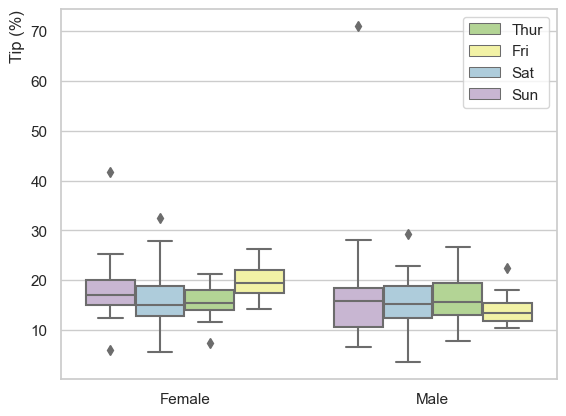

In [105]:
sns.boxplot(df, x='sex', y=df.tip/df.total_bill*100, hue='day',
           palette=['#cab2d6', '#a6cee3', '#b2df8a', '#ffff99'], order=['Female','Male'])

plt.legend(bbox_to_anchor=(1.25, 0.6), loc='center right')
plt.xlabel('')
plt.ylabel('Tip (%)', loc='top')

handles, labels = plt.gca().get_legend_handles_labels() 
order = [2,3,1,0] 
plt.legend([handles[i] for i in order], [labels[i] for i in order]) 

plt.show()

## Violin

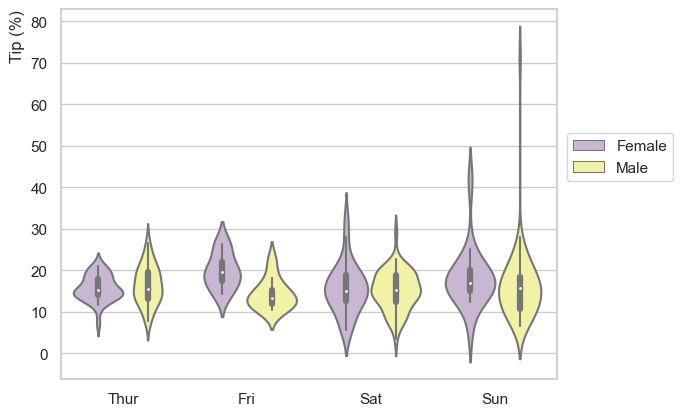

In [106]:
sns.violinplot(df, x='day', y=df.tip/df.total_bill*100, hue='sex', 
               palette=['#cab2d6', '#ffff99'], order=['Thur','Fri','Sat','Sun'])

plt.legend(bbox_to_anchor=(1.25, 0.6), loc='center right')
plt.xlabel('')
plt.ylabel('Tip (%)', loc='top')

plt.show()

## Histogram

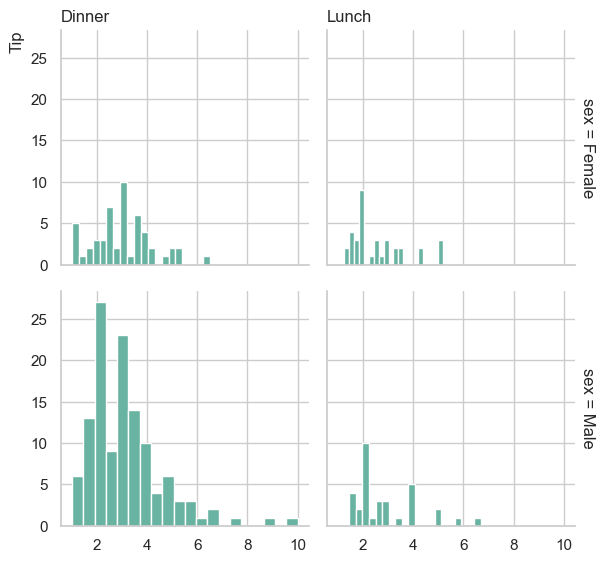

In [107]:
g = sns.FacetGrid(df, row='sex', col='time', margin_titles=True)
g.map(plt.hist, 'tip', bins=20, color='#69b3a2')
g.axes[0,0].set_title('')
g.axes[0,0].set_title('Dinner', loc='left')
g.axes[0,1].set_title('')
g.axes[0,1].set_title('Lunch', loc='left')
g.axes[1,0].set_title('')
g.axes[1,1].set_title('')

g.axes[0,0].set_ylabel('Tip', loc='top')
g.axes[1,0].set_ylabel('')
g.axes[1,0].set_xlabel('')
g.axes[1,1].set_xlabel('')

plt.show()